In [2]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

## An√°lise Descritiva


In [3]:
# Carregar o dataset limpo do CSV
# Altere o caminho abaixo para o local correto do arquivo em seu computador
df_clean = pd.read_csv('cleaned_data.csv')
df_clean

codigo_instituicao                                        instituicao  \
0                     502     Universidade de Coimbra - Faculdade de Direito   
1                     501  Universidade de Coimbra - Faculdade de Ci√™ncia...   
2                     804  Universidade T√©cnica de Lisboa - Instituto Sup...   
3                     902  Universidade Nova de Lisboa - Faculdade de Ci√™...   
4                     802  Universidade T√©cnica de Lisboa - Faculdade de ...   
...                   ...                                                ...   
18230                6810  ISCTE - Instituto Universit√°rio de Lisboa (Sin...   
18231                3092  Instituto Polit√©cnico da Guarda - Escola Super...   
18232                 140  Universidade dos A√ßores - Faculdade de Ci√™ncia...   
18233                1203  Universidade de Tr√°s-os-Montes e Alto Douro - ...   
18234                3012  Universidade de Aveiro - Escola Superior de Te...   

      codigo_curso                                           curso  \
0             0003                           Administra√ß√£o P√∫blica   
1             0016                                    Antropologia   
2             0016                                    Antropologia   
3             0016                                    Antropologia   
4             0021                  Arquitectura de Design de Moda   
...            ...                                             ...   
18230         L329  Tecnologias Digitais e Seguran√ßa de Informa√ß√£o   
18231         L335               Design de Equipamento e Ambientes   
18232         L344                  Guias de Natureza e Patrim√≥nio   
18233         L345             Cidades Sustent√°veis e Inteligentes   
18234         L346                 Engenharia Inform√°tica Aplicada   

       vagas_iniciais  colocados  nota_ultimo_colocado  vagas_sobrantes   ano  \
0                50.0       30.0                 116.0             20.0  2004   
1                45.0       45.0                 112.0              0.0  2004   
2                49.0       36.0                 104.5             13.0  2004   
3                60.0       60.0                 106.0              0.0  2004   
4                30.0       30.0                 156.0              0.0  2004   
...               ...        ...                   ...              ...   ...   
18230            32.0       32.0                 135.2              0.0  2024   
18231            24.0       19.0                 117.9              5.0  2024   
18232            19.0        7.0                 120.3             12.0  2024   
18233            25.0        2.0                 113.5             23.0  2024   
18234            27.0       27.0                 139.2              0.0  2024   

       fase  taxa_ocupacao                            nome_universidade  \
0         1       0.600000                      Universidade de Coimbra   
1         1       1.000000                      Universidade de Coimbra   
2         1       0.734694               Universidade T√©cnica de Lisboa   
3         1       1.000000                  Universidade Nova de Lisboa   
4         1       1.000000               Universidade T√©cnica de Lisboa   
...     ...            ...                                          ...   
18230     1       1.000000                                        ISCTE   
18231     1       0.791667              Instituto Polit√©cnico da Guarda   
18232     1       0.368421                      Universidade dos A√ßores   
18233     1       0.080000  Universidade de Tr√°s-os-Montes e Alto Douro   
18234     1       1.000000                       Universidade de Aveiro   

                                          nome_faculdade  course_id  
0                                   Faculdade de Direito  0003_0502  
1                     Faculdade de Ci√™ncias e Tecnologia  0016_0501  
2      Instituto Superior de Ci√™ncias Sociais e Pol√≠t...  0016_0804  
3                Faculdad

### Evolu√ß√£o dos Indicadores do Ensino Superior 


=== INDICADORES ESTAT√çSTICOS GERAIS ===

Estat√≠sticas Gerais:
- Total de vagas oferecidas: 890,192.0
- Total de colocados: 746,415.0
- Taxa de ocupa√ß√£o m√©dia: 77.7%
- Nota m√©dia do √∫ltimo colocado: 129.4


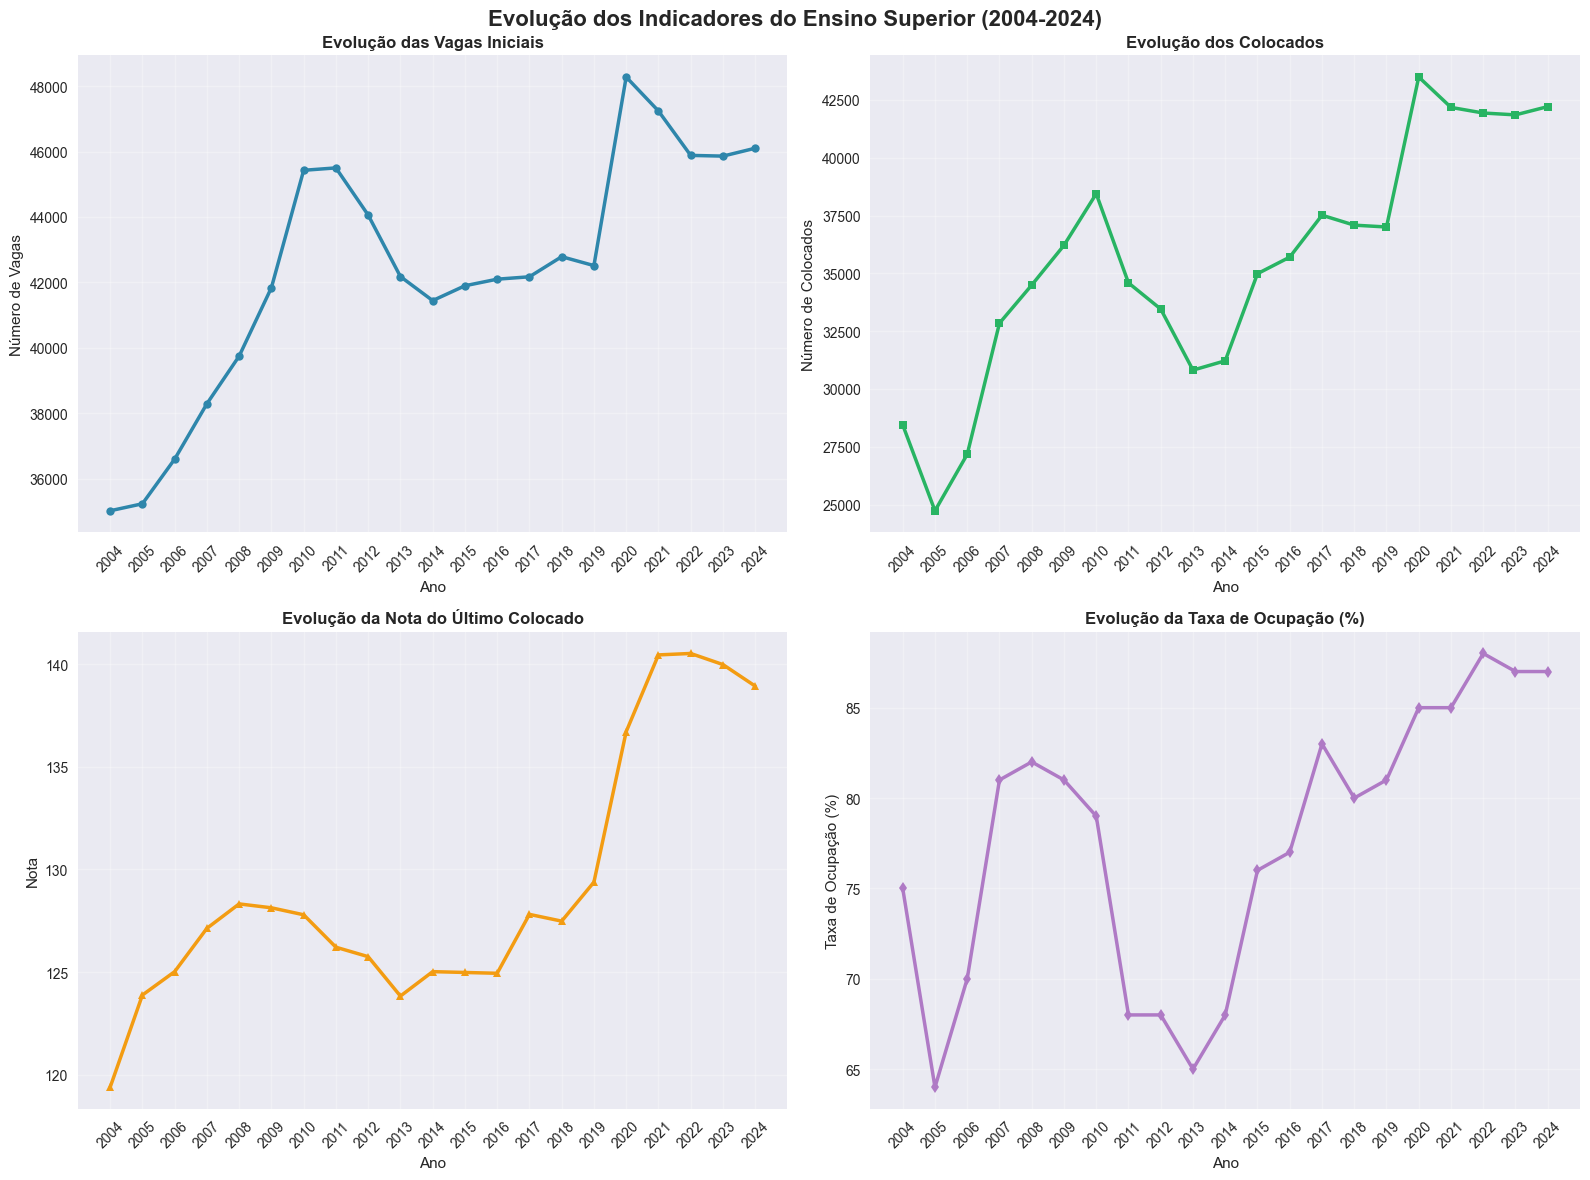

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')  # Estilo moderno
sns.set_palette("husl")        # Paleta suave

print("\n=== INDICADORES ESTAT√çSTICOS GERAIS ===\n")

# Estat√≠sticas gerais
print("Estat√≠sticas Gerais:")
print(f"- Total de vagas oferecidas: {df_clean['vagas_iniciais'].sum():,}")
print(f"- Total de colocados: {df_clean['colocados'].sum():,}")
print(f"- Taxa de ocupa√ß√£o m√©dia: {df_clean['taxa_ocupacao'].mean():.1%}")
print(f"- Nota m√©dia do √∫ltimo colocado: {df_clean['nota_ultimo_colocado'].mean():.1f}")

# Estat√≠sticas anuais agregadas
yearly_stats = df_clean.groupby('ano').agg({
    'vagas_iniciais': 'sum',
    'colocados': 'sum', 
    'taxa_ocupacao': 'mean',
    'nota_ultimo_colocado': 'mean'
}).round(2)

# Cores modernas e distintas
cor_vagas = '#2E86AB'
cor_colocados = '#28B463'
cor_nota = '#F39C12'
cor_ocupacao = '#AF7AC5'

# Gr√°ficos com layout moderno
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Evolu√ß√£o dos Indicadores do Ensino Superior (2004-2024)', fontsize=16, fontweight='bold', y=0.98)

# Vagas Iniciais
axes[0, 0].plot(yearly_stats.index, yearly_stats['vagas_iniciais'], 
                marker='o', linewidth=2.5, markersize=6, color=cor_vagas)
axes[0, 0].set_title('Evolu√ß√£o das Vagas Iniciais', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Ano')
axes[0, 0].set_ylabel('N√∫mero de Vagas')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(yearly_stats.index)
axes[0, 0].tick_params(axis='x', rotation=45)

# Colocados
axes[0, 1].plot(yearly_stats.index, yearly_stats['colocados'], 
                marker='s', linewidth=2.5, markersize=6, color=cor_colocados)
axes[0, 1].set_title('Evolu√ß√£o dos Colocados', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Ano')
axes[0, 1].set_ylabel('N√∫mero de Colocados')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_xticks(yearly_stats.index)
axes[0, 1].tick_params(axis='x', rotation=45)

# Nota do √öltimo Colocado
axes[1, 0].plot(yearly_stats.index, yearly_stats['nota_ultimo_colocado'], 
                marker='^', linewidth=2.5, markersize=6, color=cor_nota)
axes[1, 0].set_title('Evolu√ß√£o da Nota do √öltimo Colocado', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Ano')
axes[1, 0].set_ylabel('Nota')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(yearly_stats.index)
axes[1, 0].tick_params(axis='x', rotation=45)

# Taxa de Ocupa√ß√£o
axes[1, 1].plot(yearly_stats.index, yearly_stats['taxa_ocupacao'] * 100, 
                marker='d', linewidth=2.5, markersize=6, color=cor_ocupacao)
axes[1, 1].set_title('Evolu√ß√£o da Taxa de Ocupa√ß√£o (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Ano')
axes[1, 1].set_ylabel('Taxa de Ocupa√ß√£o (%)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_xticks(yearly_stats.index)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [5]:
#A nota m√©dia do √∫ltimo colocado
nota_media_ultimo_colocado = df_clean['nota_ultimo_colocado'].mean()
print(f"\nNota m√©dia do √∫ltimo colocado: {nota_media_ultimo_colocado:.1f}")
# Taxa de ocupa√ß√£o m√©dia
taxa_ocupacao_media = df_clean['taxa_ocupacao'].mean()  
print(f"Taxa de ocupa√ß√£o m√©dia: {taxa_ocupacao_media:.1%}") 



Nota m√©dia do √∫ltimo colocado: 129.4
Taxa de ocupa√ß√£o m√©dia: 77.7%


In [6]:
#Forma de exibir os dados com graficos n√£o modernos 
'''
# ============================================================================
# GENERAL STATISTICAL INDICATORS
# ============================================================================

print("\n=== INDICADORES ESTAT√çSTICOS GERAIS ===\n")

# Overall statistics
print("Estat√≠sticas Gerais:")
print(f"- Total de vagas oferecidas: {df_clean['vagas_iniciais'].sum():,}")
print(f"- Total de colocados: {df_clean['colocados'].sum():,}")
print(f"- Taxa de ocupa√ß√£o m√©dia: {df_clean['taxa_ocupacao'].mean():.1%}")
print(f"- Nota m√©dia do √∫ltimo colocado: {df_clean['nota_ultimo_colocado'].mean():.1f}")

# Statistics by year - Visual representation
yearly_stats = df_clean.groupby('ano').agg({
    'vagas_iniciais': 'sum',
    'colocados': 'sum', 
    'taxa_ocupacao': 'mean',
    'nota_ultimo_colocado': 'mean'
}).round(2)

# Create 4 separate figures
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Vagas Iniciais
ax1.plot(yearly_stats.index, yearly_stats['vagas_iniciais'], 'b-')
ax1.set_title('Evolu√ß√£o das Vagas Iniciais')
ax1.set_xlabel('Ano')
ax1.set_ylabel('N√∫mero de Vagas')
ax1.set_xticks(yearly_stats.index)
ax1.set_xticklabels(yearly_stats.index, rotation=45)

# Plot 2: Colocados
ax2.plot(yearly_stats.index, yearly_stats['colocados'], 'g-')
ax2.set_title('Evolu√ß√£o dos Colocados')
ax2.set_xlabel('Ano')
ax2.set_ylabel('N√∫mero de Colocados')
ax2.set_xticks(yearly_stats.index)
ax2.set_xticklabels(yearly_stats.index, rotation=45)

# Plot 3: Nota √öltimo Colocado
ax3.plot(yearly_stats.index, yearly_stats['nota_ultimo_colocado'], 'r-')
ax3.set_title('Evolu√ß√£o da Nota do √öltimo Colocado')
ax3.set_xlabel('Ano')
ax3.set_ylabel('Nota')
ax3.set_xticks(yearly_stats.index)
ax3.set_xticklabels(yearly_stats.index, rotation=45)

# Plot 4: Taxa de Ocupa√ß√£o
ax4.plot(yearly_stats.index, yearly_stats['taxa_ocupacao']*100, 'y-')
ax4.set_title('Evolu√ß√£o da Taxa de Ocupa√ß√£o')
ax4.set_xlabel('Ano')
ax4.set_ylabel('Taxa de Ocupa√ß√£o (%)')
ax4.set_xticks(yearly_stats.index)
ax4.set_xticklabels(yearly_stats.index, rotation=45)

plt.tight_layout()
plt.show()

'''

'\n# ============================================================================\n# GENERAL STATISTICAL INDICATORS\n# ============================================================================\n\nprint("\n=== INDICADORES ESTAT√çSTICOS GERAIS ===\n")\n\n# Overall statistics\nprint("Estat√≠sticas Gerais:")\nprint(f"- Total de vagas oferecidas: {df_clean[\'vagas_iniciais\'].sum():,}")\nprint(f"- Total de colocados: {df_clean[\'colocados\'].sum():,}")\nprint(f"- Taxa de ocupa√ß√£o m√©dia: {df_clean[\'taxa_ocupacao\'].mean():.1%}")\nprint(f"- Nota m√©dia do √∫ltimo colocado: {df_clean[\'nota_ultimo_colocado\'].mean():.1f}")\n\n# Statistics by year - Visual representation\nyearly_stats = df_clean.groupby(\'ano\').agg({\n    \'vagas_iniciais\': \'sum\',\n    \'colocados\': \'sum\', \n    \'taxa_ocupacao\': \'mean\',\n    \'nota_ultimo_colocado\': \'mean\'\n}).round(2)\n\n# Create 4 separate figures\nfig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))\n\n# Plot 1: Vagas Ini

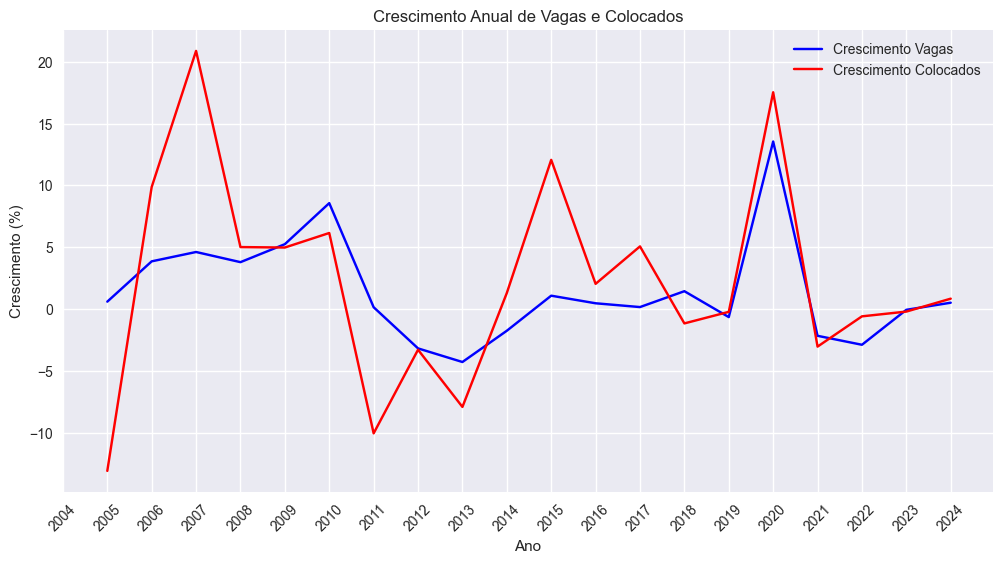

In [7]:
# ============================================================================
# 4. INDICADORES TEMPORAIS / TEND√äNCIAS
# ============================================================================

# Calcula m√©tricas anuais de procura 
yearly_demand = df_clean.groupby('ano').agg({
    'vagas_iniciais': 'sum',  # Soma total de vagas por ano
    'colocados': 'sum',       # Soma total de colocados por ano
    'instituicao': 'nunique', # N√∫mero de institui√ß√µes √∫nicas por ano
    'curso': 'nunique'        # N√∫mero de cursos √∫nicos por ano
})

# Calcula taxas de crescimento anual
yearly_demand['crescimento_vagas'] = yearly_demand['vagas_iniciais'].pct_change() * 100
yearly_demand['crescimento_colocados'] = yearly_demand['colocados'].pct_change() * 100

# Gr√°fico das taxas de crescimento ao longo do tempo 
plt.figure(figsize=(12,6))
plt.plot(yearly_demand.index, yearly_demand['crescimento_vagas'], 'b-', label='Crescimento Vagas')
plt.plot(yearly_demand.index, yearly_demand['crescimento_colocados'], 'r-', label='Crescimento Colocados')
plt.title('Crescimento Anual de Vagas e Colocados')
plt.xlabel('Ano')
plt.ylabel('Crescimento (%)')
plt.legend()
plt.grid(True)
plt.xticks(yearly_demand.index, rotation=45)
plt.show()

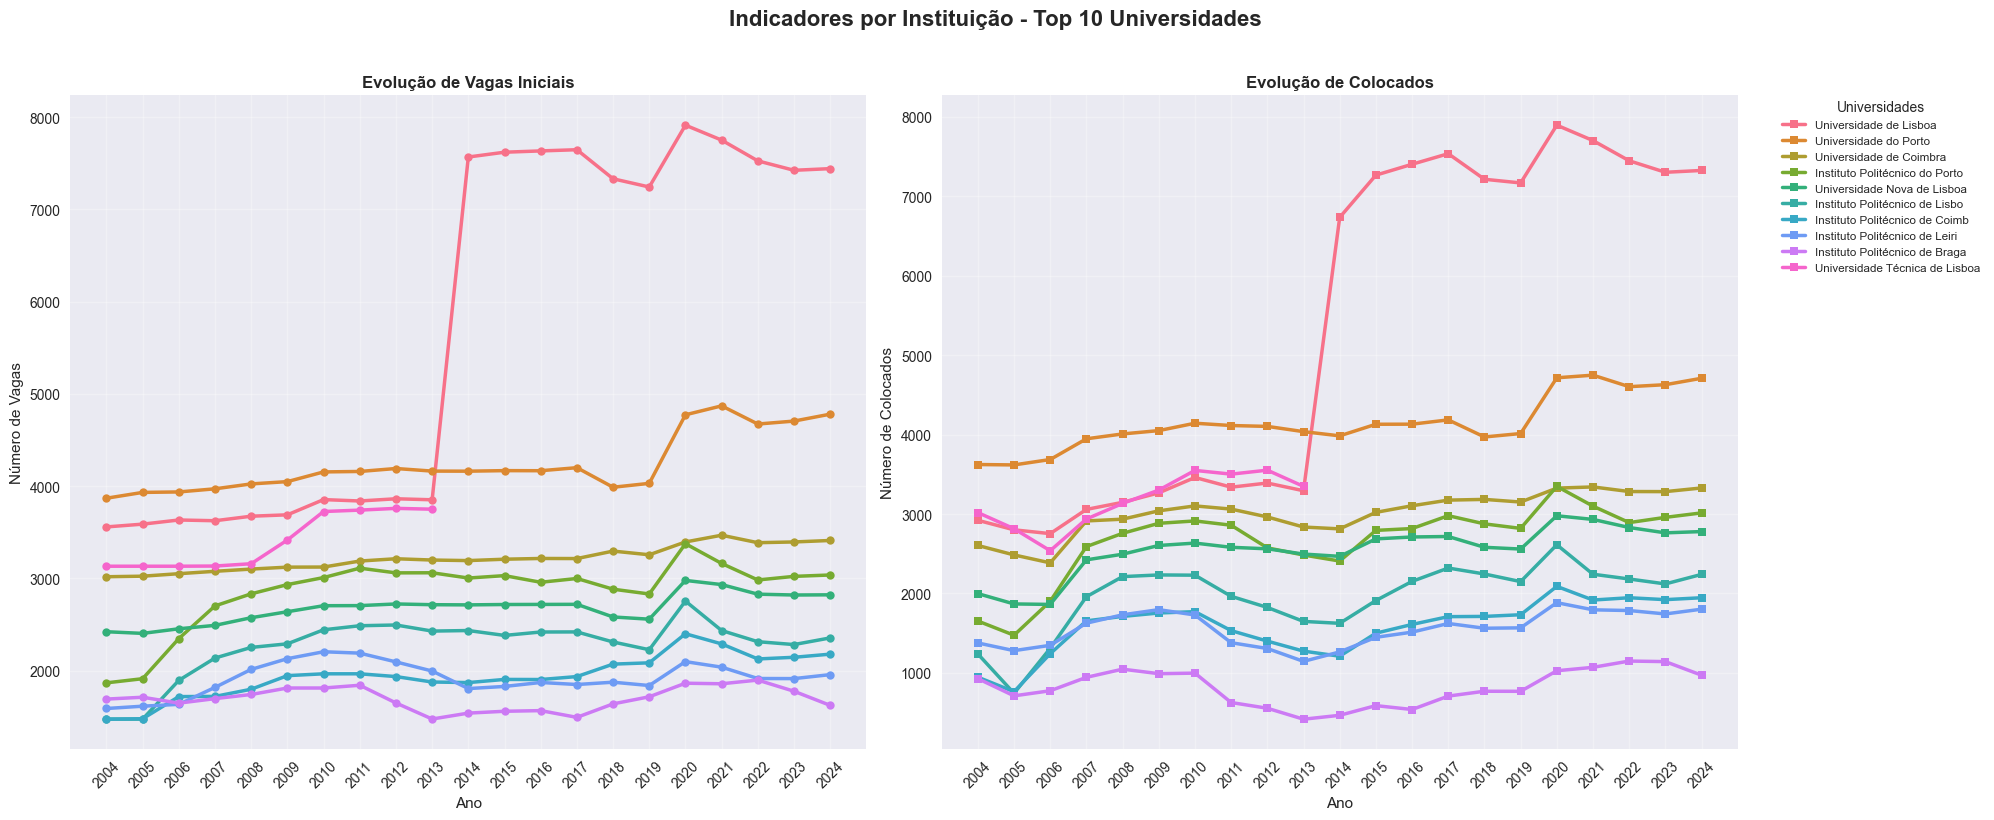

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ============================================================================
# 5. INDICADORES POR CURSO/INSTITUI√á√ÉO (vers√£o moderna)
# ============================================================================

# Calcula m√©tricas hist√≥ricas de competitividade por curso
course_competition = df_clean.groupby('curso').agg({
    'vagas_iniciais': 'sum',
    'colocados': 'sum',
    'taxa_ocupacao': 'mean',
    'nota_ultimo_colocado': 'mean'
}).round(2)

# Seleciona as 10 maiores universidades em vagas
top_institutions = df_clean.groupby('nome_universidade')['vagas_iniciais'].sum()\
                    .sort_values(ascending=False).head(10).index
colors = sns.color_palette("husl", len(top_institutions))  # Paleta harmonizada

# Cria figura com dois subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Indicadores por Institui√ß√£o - Top 10 Universidades', fontsize=16, fontweight='bold', y=1.02)

# Gr√°fico: Evolu√ß√£o de Vagas
for inst, color in zip(top_institutions, colors):
    data = df_clean[df_clean['nome_universidade'] == inst]
    yearly_data = data.groupby('ano')['vagas_iniciais'].sum()
    ax1.plot(yearly_data.index, yearly_data.values, marker='o', linewidth=2.5, markersize=6, label=inst[:30], color=color)

ax1.set_title('Evolu√ß√£o de Vagas Iniciais', fontsize=12, fontweight='bold')
ax1.set_xlabel('Ano')
ax1.set_ylabel('N√∫mero de Vagas')
ax1.set_xticks(sorted(df_clean['ano'].unique()))
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# Gr√°fico: Evolu√ß√£o de Colocados
for inst, color in zip(top_institutions, colors):
    data = df_clean[df_clean['nome_universidade'] == inst]
    yearly_data = data.groupby('ano')['colocados'].sum()
    ax2.plot(yearly_data.index, yearly_data.values, marker='s', linewidth=2.5, markersize=6, label=inst[:30], color=color)

ax2.set_title('Evolu√ß√£o de Colocados', fontsize=12, fontweight='bold')
ax2.set_xlabel('Ano')
ax2.set_ylabel('N√∫mero de Colocados')
ax2.set_xticks(sorted(df_clean['ano'].unique()))
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small', title="Universidades")

plt.tight_layout()
plt.show()


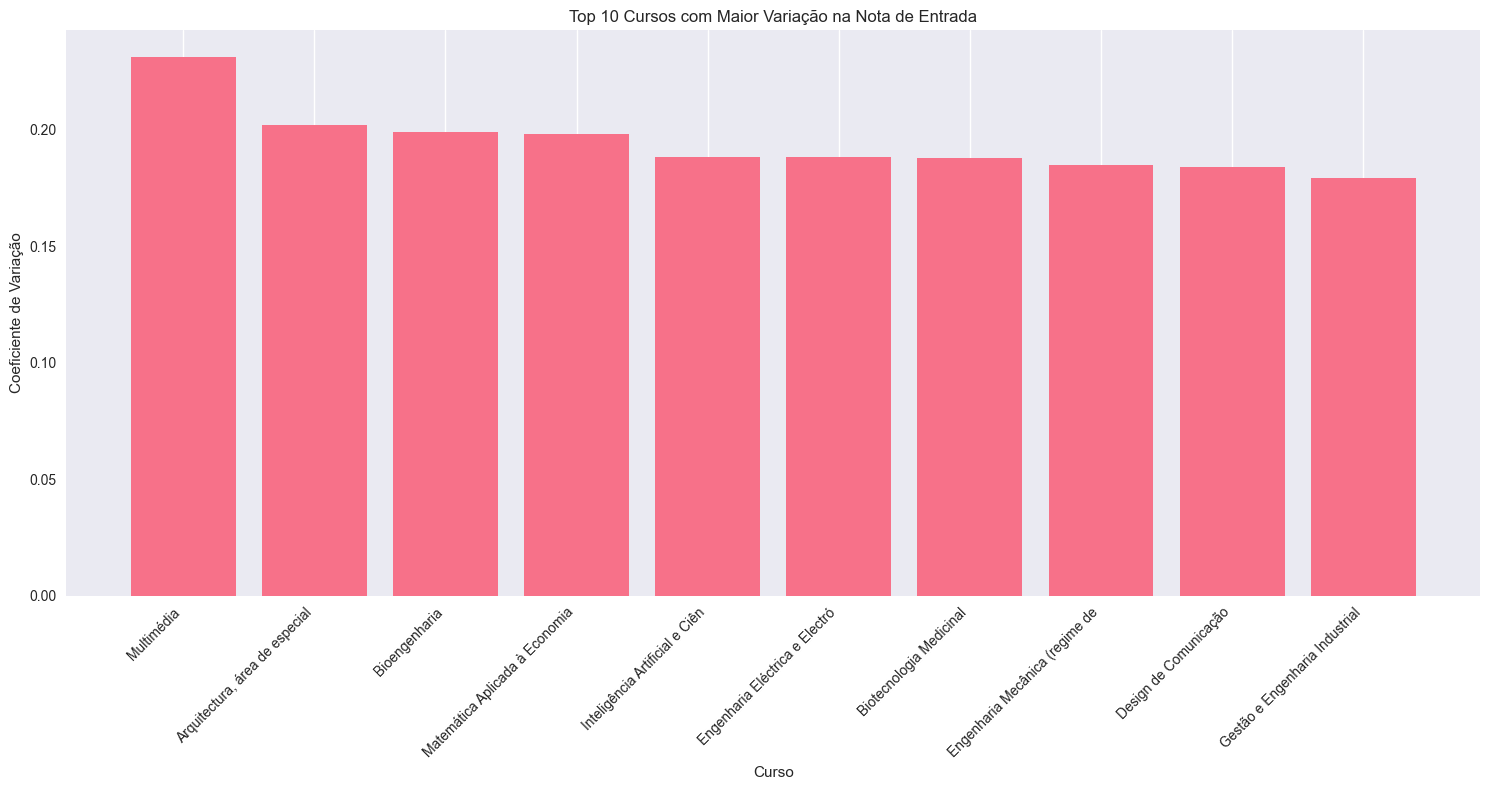

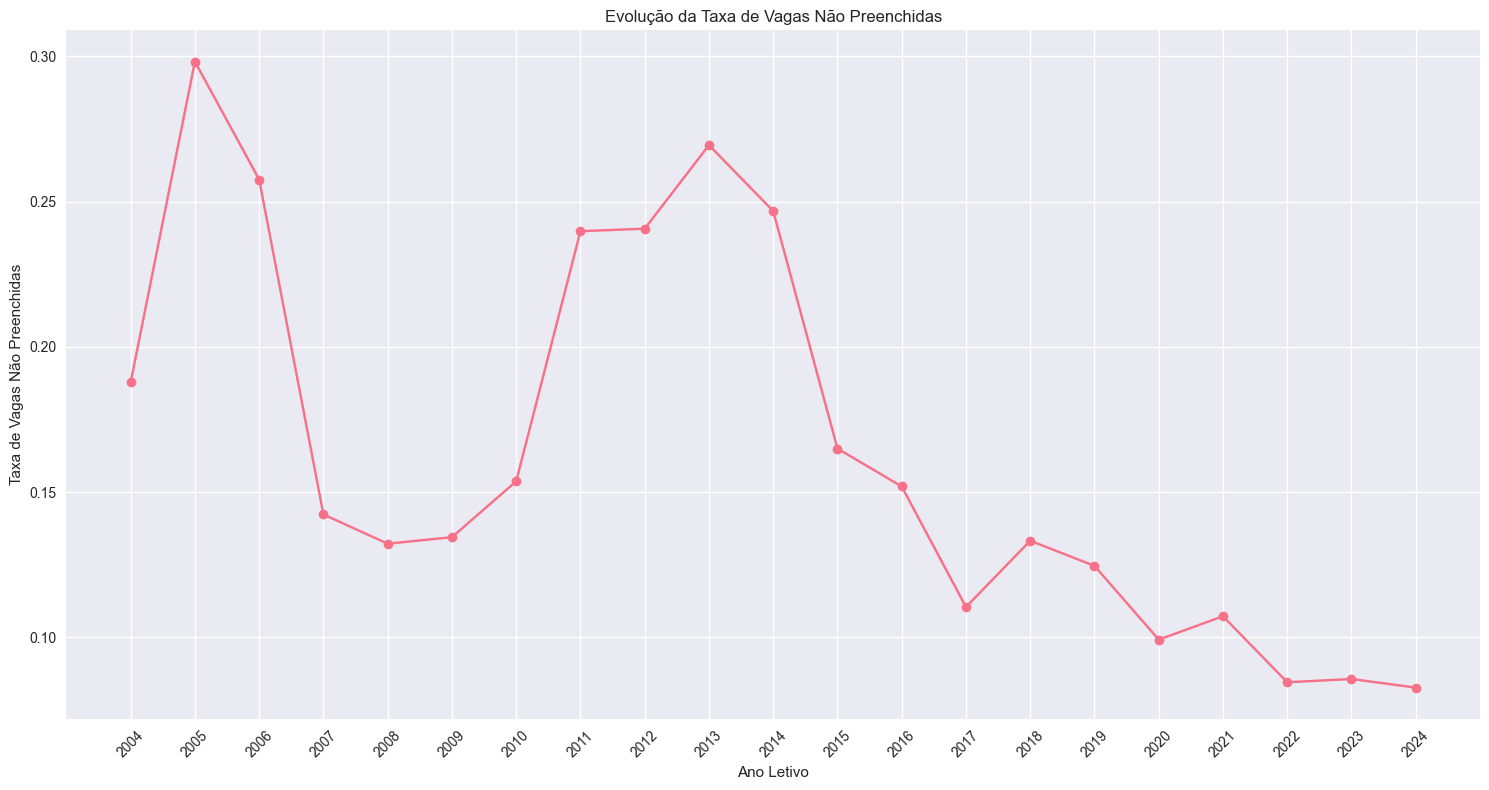

In [9]:
# An√°lise da varia√ß√£o das notas de corte por curso
# Calcula m√©dia, desvio padr√£o e contagem de anos para cada curso
grade_variation = df_clean.groupby('curso')['nota_ultimo_colocado'].agg(['mean', 'std', 'count'])
# Filtra apenas cursos com pelo menos 3 anos de dados
grade_variation = grade_variation[grade_variation['count'] >= 3]  
# Calcula o coeficiente de varia√ß√£o (desvio padr√£o / m√©dia)
grade_variation['cv'] = grade_variation['std'] / grade_variation['mean']  
# Seleciona os 10 cursos com maior varia√ß√£o
high_variation_courses = grade_variation.sort_values('cv', ascending=False).head(10)

# Gr√°fico dos cursos com maior varia√ß√£o na nota de corte
plt.figure(figsize=(15,8))
bars = plt.bar(high_variation_courses.index.str[:30], high_variation_courses['cv'])
plt.title('Top 10 Cursos com Maior Varia√ß√£o na Nota de Entrada')
plt.ylabel('Coeficiente de Varia√ß√£o')
plt.xlabel('Curso')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# An√°lise da satura√ß√£o do mercado ao longo dos anos
# Soma vagas sobrantes e iniciais por ano
market_saturation = df_clean.groupby('ano').agg({
    'vagas_sobrantes': 'sum',
    'vagas_iniciais': 'sum'
})
# Calcula percentual de vagas n√£o preenchidas
market_saturation['taxa_vagas_nao_preenchidas'] = market_saturation['vagas_sobrantes'] / market_saturation['vagas_iniciais']

# Gr√°fico da evolu√ß√£o das vagas n√£o preenchidas
plt.figure(figsize=(15,8))
plt.plot(market_saturation.index, market_saturation['taxa_vagas_nao_preenchidas'], marker='o')
plt.title('Evolu√ß√£o da Taxa de Vagas N√£o Preenchidas')
plt.xlabel('Ano Letivo')
plt.ylabel('Taxa de Vagas N√£o Preenchidas')
plt.grid(True)
plt.xticks(market_saturation.index, rotation=45)
plt.tight_layout()
plt.show()

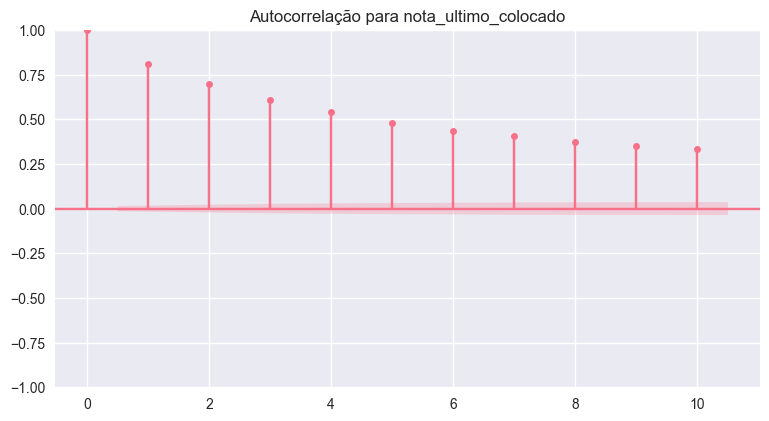

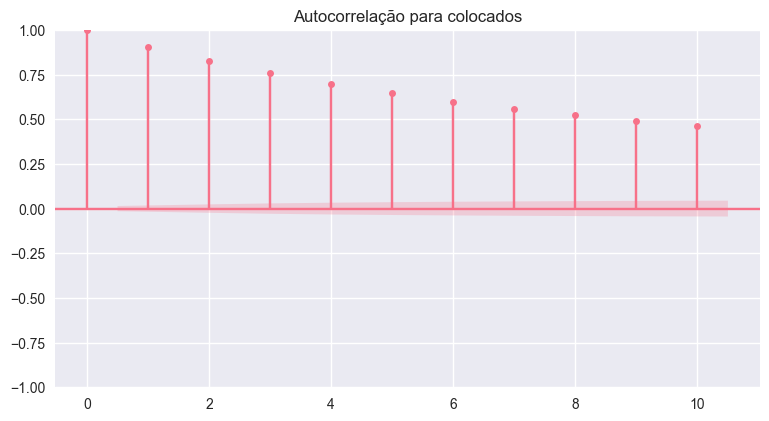

'üîç Principais Conclus√µes do Gr√°fico:\n1. Lag 0 = 1.0\n\nSempre igual a 1 (correla√ß√£o perfeita consigo mesmo).\nN√£o √© significativo analiticamente ‚Äî ignoramos.\n\n2. Lag 1 ~ 0.43\n\nO valor da nota_ultimo_colocado deste ano tem correla√ß√£o positiva moderada com o valor do ano anterior.\nSugere persist√™ncia: o desempenho passado influencia o desempenho atual.\n\n3. Decaimento Gradual\n\nACF diminui lentamente ao longo dos lags, mantendo-se estatisticamente significativo at√© lag ~18-20.\nEste padr√£o sugere:\nProcesso de mem√≥ria longa: valores passados permanecem relevantes por muito tempo.\nN√£o-estacionariedade √© prov√°vel ‚Äî a s√©rie pode ter tend√™ncia ou sazonalidade ao longo do tempo.\n4. Todos os lags > 0 permanecem acima da banda de confian√ßa\n\nSem queda s√∫bita (como em ru√≠do branco), significando que a s√©rie temporal n√£o √© aleat√≥ria.\nA autocorrela√ß√£o √© significativa e √∫til para previs√µes.'

In [10]:
# An√°lise de Correla√ß√£o Temporal dos Cursos

# Prepara DataFrame para an√°lise da nota do √∫ltimo colocado
# Seleciona apenas as colunas necess√°rias e ordena por curso e ano
df_test_lag_nota = df_clean[['ano', 'course_id', 'nota_ultimo_colocado']].sort_values(['course_id', 'ano']).copy()

# Gera gr√°fico de autocorrela√ß√£o para nota do √∫ltimo colocado
# Mostra como os valores se correlacionam com valores anteriores
plt.figure(figsize=(15, 12))
for i, feature in enumerate(['nota_ultimo_colocado'], 1):
    plt.subplot(3, 2, i)
    plot_acf(df_test_lag_nota[feature], lags=10, ax=plt.gca(), title=f'Autocorrela√ß√£o para {feature}')
plt.tight_layout()
plt.show()

# Prepara DataFrame para an√°lise do n√∫mero de colocados
# Seleciona apenas as colunas necess√°rias e ordena por curso e ano
df_test_lag_colocados = df_clean[['ano', 'course_id', 'colocados']].sort_values(['course_id', 'ano']).copy()

# Gera gr√°fico de autocorrela√ß√£o para n√∫mero de colocados
# Mostra como os valores se correlacionam com valores anteriores
plt.figure(figsize=(15, 12))
for i, feature in enumerate(['colocados'], 1):
    plt.subplot(3, 2, i)
    plot_acf(df_test_lag_colocados[feature], lags=10, ax=plt.gca(), title=f'Autocorrela√ß√£o para {feature}')
plt.tight_layout()
plt.show()

"""üîç Principais Conclus√µes do Gr√°fico:
1. Lag 0 = 1.0

Sempre igual a 1 (correla√ß√£o perfeita consigo mesmo).
N√£o √© significativo analiticamente ‚Äî ignoramos.

2. Lag 1 ~ 0.43

O valor da nota_ultimo_colocado deste ano tem correla√ß√£o positiva moderada com o valor do ano anterior.
Sugere persist√™ncia: o desempenho passado influencia o desempenho atual.

3. Decaimento Gradual

ACF diminui lentamente ao longo dos lags, mantendo-se estatisticamente significativo at√© lag ~18-20.
Este padr√£o sugere:
Processo de mem√≥ria longa: valores passados permanecem relevantes por muito tempo.
N√£o-estacionariedade √© prov√°vel ‚Äî a s√©rie pode ter tend√™ncia ou sazonalidade ao longo do tempo.
4. Todos os lags > 0 permanecem acima da banda de confian√ßa

Sem queda s√∫bita (como em ru√≠do branco), significando que a s√©rie temporal n√£o √© aleat√≥ria.
A autocorrela√ß√£o √© significativa e √∫til para previs√µes."""

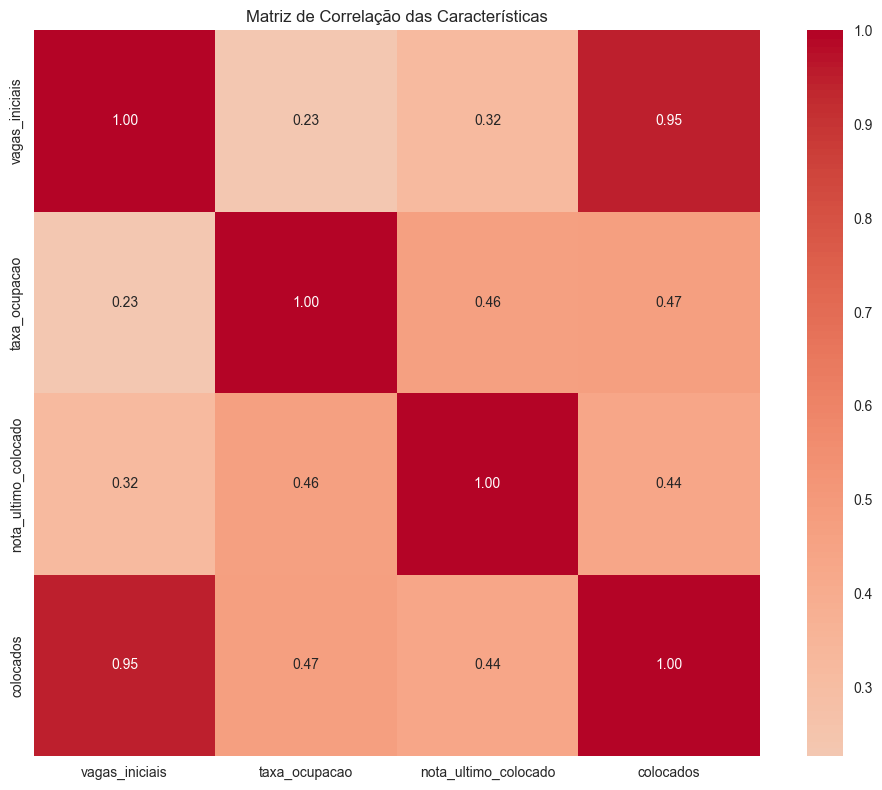

In [11]:
# An√°lise de correla√ß√£o das caracter√≠sticas principais

# Seleciona apenas as colunas num√©ricas iniciais
initial_columns=df_clean[['vagas_iniciais', 'taxa_ocupacao', 'nota_ultimo_colocado', 'colocados']]

# Cria matriz de correla√ß√£o entre as vari√°veis
correlation_matrix = initial_columns.corr()

# Cria um mapa de calor para visualizar as correla√ß√µes
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Mostra os valores das correla√ß√µes
            cmap='coolwarm',  # Esquema de cores
            center=0,  # Centraliza as cores no valor 0
            fmt='.2f',  # Formata valores com 2 casas decimais
            square=True)  # Deixa o gr√°fico quadrado

plt.title('Matriz de Correla√ß√£o das Caracter√≠sticas')
plt.tight_layout()  # Ajusta o layout para n√£o cortar as legendas
plt.show()

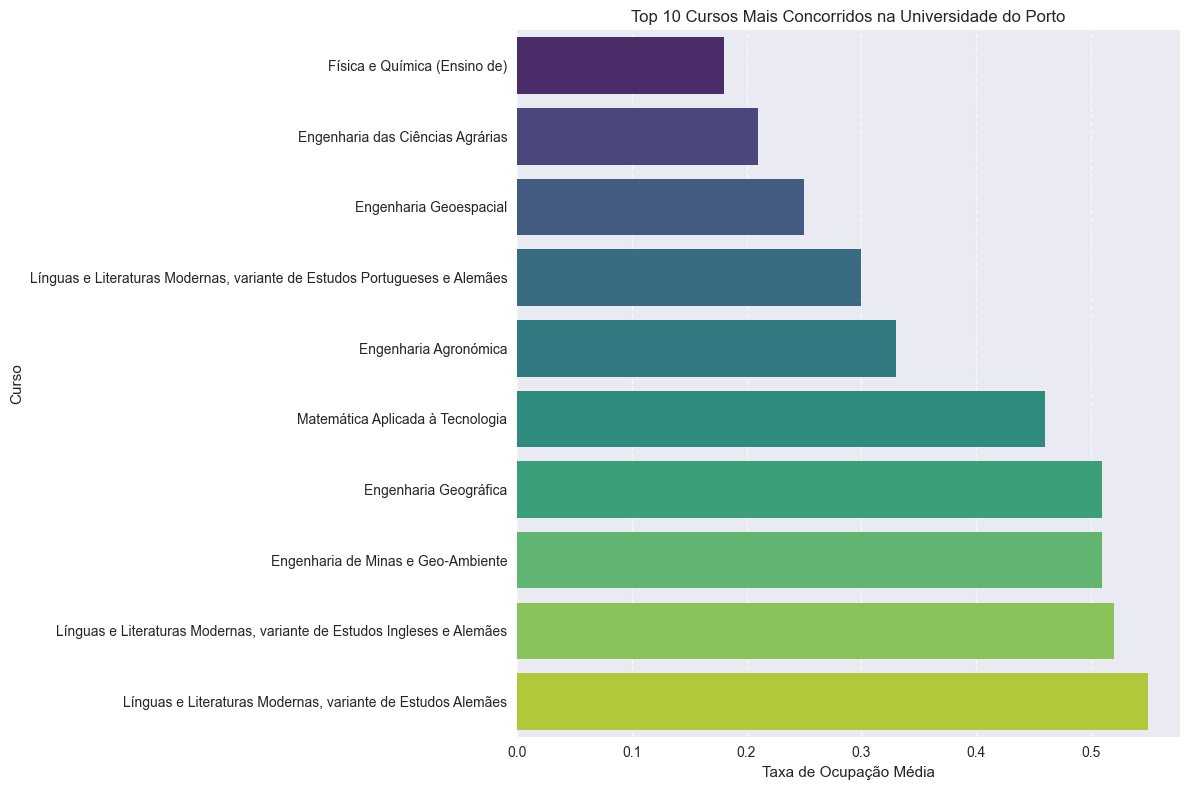

In [14]:
# Cursos mais concorridos na universidade do porto 
# Filtra os dados para a Universidade do Porto
df_up = df_clean[df_clean['nome_universidade'] == 'Universidade do Porto']
# Agrupa por curso e calcula a taxa de ocupa√ß√£o m√©dia
up_course_competition = df_up.groupby('curso').agg({    
    'vagas_iniciais': 'sum',
    'colocados': 'sum',
    'taxa_ocupacao': 'mean',
    'nota_ultimo_colocado': 'mean'
}).round(2)
# Ordena por taxa de ocupa√ß√£o e seleciona os 10 cursos mais concorridos
top_up_courses = up_course_competition.sort_values('taxa_ocupacao', ascending=True).head(10)
# Cria gr√°fico de barras para os cursos mais concorridos
plt.figure(figsize=(12, 8))
sns.barplot(x=top_up_courses['taxa_ocupacao'], 
            y=top_up_courses.index, 
            palette='viridis', 
            orient='h') 
plt.title('Top 10 Cursos Mais Concorridos na Universidade do Porto')
plt.xlabel('Taxa de Ocupa√ß√£o M√©dia')    
plt.ylabel('Curso')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



# 3. Feature engineering 

In [9]:
# Cria um novo dataframe com as colunas relevantes para an√°lise
df_feature_eng=df_clean[['ano','course_id','codigo_instituicao', 'instituicao', 'codigo_curso', 'curso','vagas_iniciais','taxa_ocupacao', 'nota_ultimo_colocado', 'colocados']].copy()

# Calcula a m√©dia cumulativa das notas de corte por curso ao longo dos anos anteriores
# Usa shift(1) para excluir o ano atual e expanding() para calcular a m√©dia m√≥vel
df_feature_eng[f'media_curso_cumulativa'] = (
    df_feature_eng
    .groupby('course_id')['nota_ultimo_colocado']
    .transform(lambda x: x.shift(1).expanding(min_periods=1).mean())
).round(1)

# Calcula a m√©dia cumulativa das notas de corte por institui√ß√£o ao longo dos anos anteriores
# Mesmo processo: exclui ano atual e calcula m√©dia m√≥vel dos anos anteriores
df_feature_eng[f'media_inst_cumulativa'] = (
    df_feature_eng
    .groupby('codigo_instituicao')['nota_ultimo_colocado']
    .transform(lambda x: x.shift(1).expanding(min_periods=1).mean())
).round(1)

# Calcula a m√©dia m√≥vel da nota do √∫ltimo colocado nos √∫ltimos n anos para cada curso
for n in range(1, 5):
    df_feature_eng[f'nota_ultimo_colocado_curso_{n}_anos_anteriores'] = (
        df_feature_eng
        .groupby('course_id')['nota_ultimo_colocado']
        .transform(lambda x: x.shift(1).rolling(window=n, min_periods=n).mean().round(1))
    )

# Calcula o crescimento m√©dio anual (em percentagem) da nota do √∫ltimo colocado nos √∫ltimos n anos
for n in range(1, 5):
    df_feature_eng[f'crescimento_medio_anual_percentual_nota_ultimo_colocado_{n}_anos'] = (
        df_feature_eng
        .groupby('course_id')['nota_ultimo_colocado']
        .transform(lambda x: (((x - x.shift(n)) / x.shift(n)) / n * 100).round(2))
    )

# Calcula a m√©dia m√≥vel da taxa de ocupa√ß√£o nos √∫ltimos n anos para cada curso
for n in range(1, 5):
    df_feature_eng[f'taxa_ocupacao_curso_{n}_anos_anteriores'] = (
        df_feature_eng
        .groupby('course_id')['taxa_ocupacao']
        .transform(lambda x: x.shift(1).rolling(window=n, min_periods=n).mean().round(2))
    )

# Calcula a m√©dia m√≥vel do n√∫mero de colocados nos √∫ltimos n anos para cada curso
for n in range(1, 4):
    df_feature_eng[f'numero_colocados_curso_{n}_anos_anteriores'] = (
        df_feature_eng
        .groupby('course_id')['colocados']
        .transform(lambda x: x.shift(1).rolling(window=n, min_periods=n).mean().round(0))
    )

# Calcula a taxa de crescimento do n√∫mero de colocados evitando divis√£o por zero
# Para 2 anos
df_feature_eng['crescimento_medio_anual_numero_colocados_2_anos'] = (
    df_feature_eng.apply(lambda x:
        0 if x['numero_colocados_curso_2_anos_anteriores'] == 0
        else ((x['numero_colocados_curso_1_anos_anteriores'] - x['numero_colocados_curso_2_anos_anteriores']) /
              x['numero_colocados_curso_2_anos_anteriores'] / 1),
        axis=1)
).fillna(0).round(2)

# Para 3 anos
df_feature_eng['crescimento_medio_anual_numero_colocados_3_anos'] = (
    df_feature_eng.apply(lambda x:
        0 if x['numero_colocados_curso_3_anos_anteriores'] == 0
        else ((x['numero_colocados_curso_1_anos_anteriores'] - x['numero_colocados_curso_3_anos_anteriores']) /
              x['numero_colocados_curso_3_anos_anteriores'] / 2),
        axis=1)
).fillna(0).round(2)

# Remove linhas com valores nulos
df_feature_eng.dropna(inplace=True)

### Model Training and Prediction

In [10]:
### Vamos usar random forest para prever a nota do √∫ltimo colocado

In [11]:
df_prediction=df_feature_eng.copy()

In [12]:
# Preparar dataset
df = df_prediction[[
 'ano',
 'course_id',

 'nota_ultimo_colocado',

 'media_curso_cumulativa',
 'media_inst_cumulativa',

 'nota_ultimo_colocado_curso_1_anos_anteriores',
 'nota_ultimo_colocado_curso_2_anos_anteriores',
 'nota_ultimo_colocado_curso_3_anos_anteriores',

 #'crescimento_medio_anual_percentual_nota_ultimo_colocado_1_anos', ##n√£o podemos usar para previs√£o
 'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
 'crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos',

 'taxa_ocupacao_curso_1_anos_anteriores',
 'taxa_ocupacao_curso_2_anos_anteriores',
 'taxa_ocupacao_curso_3_anos_anteriores'
 ]].copy()

# Definir vari√°vel alvo e caracter√≠sticas
target = 'nota_ultimo_colocado'
time_col = 'ano'
course_id = 'course_id'

# Lista de caracter√≠sticas que vamos usar para treinar o modelo (eliminou-se features desnecess√°rias ap√≥s features selection)
features = [

    #'media_curso_cumulativa',
    #'media_inst_cumulativa',

    'nota_ultimo_colocado_curso_1_anos_anteriores',
    'nota_ultimo_colocado_curso_2_anos_anteriores',
    'nota_ultimo_colocado_curso_3_anos_anteriores',
    
    #'crescimento_medio_anual_percentual_nota_ultimo_colocado_1_anos',

    'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos',

    #'taxa_ocupacao_curso_1_anos_anteriores',
    #'taxa_ocupacao_curso_2_anos_anteriores',
    #'taxa_ocupacao_curso_3_anos_anteriores'
]

# Dividir os dados por ano:
# - Treino: anos anteriores a 2023
# - Valida√ß√£o: ano 2023
# - Teste: ano 2024

train = df[df[time_col] < 2023]
valid = df[df[time_col] == 2023]
test = df[df[time_col] == 2024]

# Separar caracter√≠sticas (X) e vari√°vel alvo (y) para cada conjunto
X_train, y_train = train[features], train[target]
X_valid, y_valid = valid[features], valid[target]
X_test, y_test = test[features], test[target]

In [13]:
#Pesquisa em grade para floresta aleat√≥ria (random forest)

param_grid = {
    'n_estimators': [30, 50, 100, 200],      #n√∫mero de √°rvores
    'max_depth': [4, 6, 8, 10, 12, 15],      #profundidade m√°xima das √°rvores
    'min_samples_split': [5, 10, 20],        #n√∫mero m√≠nimo de amostras para dividir um n√≥
    'min_samples_leaf': [2, 5, 10]           #n√∫mero m√≠nimo de amostras em cada folha
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),   #modelo base com semente aleat√≥ria fixa
    param_grid,                               #grade de par√¢metros a testar
    cv=TimeSeriesSplit(n_splits=3),          #valida√ß√£o cruzada com s√©ries temporais
    scoring='neg_mean_absolute_error',        #m√©trica de avalia√ß√£o: erro absoluto m√©dio
    n_jobs=-1                                #usar todos os n√∫cleos do processador
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_     #seleciona o melhor modelo encontrado

In [14]:
# Modelo Random Forest com os parametros otimizados
model_nota_ultimo_colocado = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, min_samples_split=5, min_samples_leaf=2)
model_nota_ultimo_colocado.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

Import√¢ncia das Features (Top 10):
                                             feature  importance_mean  \
1       nota_ultimo_colocado_curso_2_anos_anteriores         9.382269   
0       nota_ultimo_colocado_curso_1_anos_anteriores         7.154148   
3  crescimento_medio_anual_percentual_nota_ultimo...         6.962750   
2       nota_ultimo_colocado_curso_3_anos_anteriores         2.581953   
4  crescimento_medio_anual_percentual_nota_ultimo...         0.820492   

   importance_std  
1        0.221474  
0        0.199406  
3        0.150972  
2        0.052633  
4        0.034675  


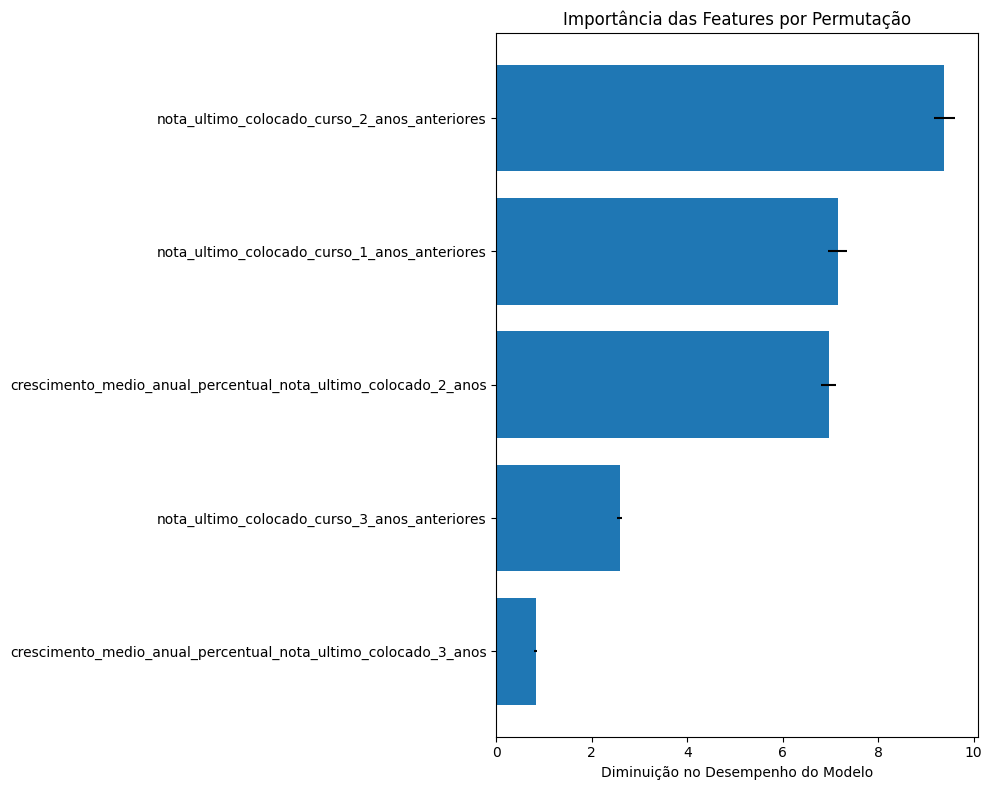

In [15]:

# Calcula a import√¢ncia das features atrav√©s de permuta√ß√£o no conjunto de valida√ß√£o
# Isto embaralha cada feature 10 vezes para ver o impacto no erro do modelo

perm_importance = permutation_importance(
    model_nota_ultimo_colocado, X_valid, y_valid, 
    n_repeats=10,  # N√∫mero de vezes que cada feature √© embaralhada
    random_state=42,
    scoring='neg_mean_absolute_error'
)

# Cria um DataFrame com os resultados da import√¢ncia das features
perm_importance_df = pd.DataFrame({
    'feature': X_valid.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("Import√¢ncia das Features (Top 10):")
print(perm_importance_df.head(10))

# Cria um gr√°fico de barras horizontais mostrando a import√¢ncia das 15 principais features
plt.figure(figsize=(10, 8))
top_features = perm_importance_df.head(15)
plt.barh(top_features['feature'], top_features['importance_mean'], 
         xerr=top_features['importance_std'])
plt.title('Import√¢ncia das Features por Permuta√ß√£o')
plt.xlabel('Diminui√ß√£o no Desempenho do Modelo')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [16]:
# Avaliar o modelo nos dados de 2023
y_pred_2023 = model_nota_ultimo_colocado.predict(X_valid)

# Calcular m√©tricas de erro para 2023
mae_2023 = mean_absolute_error(y_valid, y_pred_2023)
mse_2023 = mean_squared_error(y_valid, y_pred_2023)
rmse_2023 = np.sqrt(mse_2023)
r2_2023 = r2_score(y_valid, y_pred_2023)

# Calcular R¬≤ ajustado para 2023
n = X_valid.shape[0]  # n√∫mero de amostras
k = X_valid.shape[1]  # n√∫mero de caracter√≠sticas
adjusted_r2_2023 = 1 - (1 - r2_2023) * (n - 1) / (n - k - 1)

# Mostrar resultados de 2023
print(f"Erro M√©dio Absoluto (2023): {mae_2023:.2f}")
print(f"Erro Quadr√°tico M√©dio (2023): {mse_2023:.2f}")
print(f"Raiz do Erro Quadr√°tico M√©dio (2023): {rmse_2023:.2f}")
print(f"R¬≤ (2023): {r2_2023:.2f}")
print(f"R¬≤ Ajustado (2023): {adjusted_r2_2023:.2f}")

# Fazer previs√µes para 2024 usando todas as √°rvores do modelo
all_tree_preds_nota = np.array([tree.predict(X_test.values) for tree in model_nota_ultimo_colocado.estimators_])

# Calcular a m√©dia das previs√µes
y_pred_2024 = np.mean(all_tree_preds_nota, axis=0).round(1)

# Calcular intervalo de confian√ßa de 95%
lower_bounds = np.percentile(all_tree_preds_nota, 0.5, axis=0).round(1)
upper_bounds = np.percentile(all_tree_preds_nota, 99.5, axis=0).round(1)

# Criar DataFrame com as previs√µes e caracter√≠sticas originais
predictions_2024 = test.copy()
predictions_2024['nota_ultimo_colocado_prevista'] = y_pred_2024
predictions_2024['nota_ultimo_colocado_real'] = y_test.values
predictions_2024['erro'] = predictions_2024['nota_ultimo_colocado_prevista'] - predictions_2024['nota_ultimo_colocado_real']

# Adicionar colunas do intervalo de confian√ßa
predictions_2024['lower_95_ci'] = lower_bounds
predictions_2024['upper_95_ci'] = upper_bounds

# Ordenar por erro absoluto
predictions_2024 = predictions_2024.sort_values(by='erro', key=abs)

# Calcular m√©tricas de erro para 2024
mae = mean_absolute_error(predictions_2024['nota_ultimo_colocado_real'], predictions_2024['nota_ultimo_colocado_prevista'])
mse = mean_squared_error(predictions_2024['nota_ultimo_colocado_real'], predictions_2024['nota_ultimo_colocado_prevista'])
rmse = np.sqrt(mse)
r2 = r2_score(predictions_2024['nota_ultimo_colocado_real'], predictions_2024['nota_ultimo_colocado_prevista'])

# Calcular R¬≤ ajustado para 2024
n = len(predictions_2024)  # n√∫mero de observa√ß√µes
p = len(X_test.columns)    # n√∫mero de caracter√≠sticas
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Mostrar m√©tricas de 2024
print("\nM√©tricas das Previs√µes 2024:")
print(f"Erro M√©dio Absoluto: {mae:.2f}")
print(f"Erro Quadr√°tico M√©dio: {mse:.2f}")
print(f"Raiz do Erro Quadr√°tico M√©dio: {rmse:.2f}")
print(f"R¬≤: {r2:.3f}")
print(f"R¬≤ Ajustado: {adj_r2:.3f}")

Erro M√©dio Absoluto (2023): 1.37
Erro Quadr√°tico M√©dio (2023): 4.76
Raiz do Erro Quadr√°tico M√©dio (2023): 2.18
R¬≤ (2023): 0.99
R¬≤ Ajustado (2023): 0.98

M√©tricas das Previs√µes 2024:
Erro M√©dio Absoluto: 1.32
Erro Quadr√°tico M√©dio: 5.88
Raiz do Erro Quadr√°tico M√©dio: 2.42
R¬≤: 0.983
R¬≤ Ajustado: 0.983


In [17]:
# Calcula a percentagem de previs√µes com erro at√© 1 ponto decimal
errors_within_1 = (abs(predictions_2024['erro']) == 0).mean() * 100
print(f"Percentagem de previs√µes para 2024 sem erro: {errors_within_1:.1f}%")

# Calcula a percentagem de previs√µes com erro at√© 1 ponto decimal
errors_within_1 = (abs(predictions_2024['erro']) <= 1).mean() * 100
print(f"Percentagem de previs√µes para 2024 com erro at√© 1 ponto decimal: {errors_within_1:.1f}%")

# Calcula a percentagem de previs√µes com erro at√© 2 pontos decimais
errors_within_2 = (abs(predictions_2024['erro']) <= 2).mean() * 100
print(f"Percentagem de previs√µes para 2024 com erro at√© 2 pontos decimais: {errors_within_2:.1f}%")

# Calcula a percentagem de previs√µes com erro at√© 3 pontos decimais
errors_within_3 = (abs(predictions_2024['erro']) <= 3).mean() * 100
print(f"Percentagem de previs√µes para 2024 com erro at√© 3 pontos decimais: {errors_within_3:.1f}%")

# Calcula a percentagem de previs√µes com erro at√© 5 pontos decimais
errors_within_5 = (abs(predictions_2024['erro']) <= 5).mean() * 100
print(f"Percentagem de previs√µes para 2024 com erro at√© 5 pontos decimais: {errors_within_5:.1f}%")

# Verifica se os valores reais est√£o dentro do intervalo de confian√ßa de 99%
within_ci = ((predictions_2024['nota_ultimo_colocado_real'] >= predictions_2024['lower_95_ci']) &
             (predictions_2024['nota_ultimo_colocado_real'] <= predictions_2024['upper_95_ci'])).mean()

print(f"Percentagem de valores reais de 2024 dentro do intervalo de confian√ßa de 99%: {within_ci * 100:.1f}%")

# Mostra os cursos onde o erro de previs√£o foi superior a 1 ponto
predictions_2024[['ano', 'course_id','nota_ultimo_colocado_prevista','lower_95_ci','upper_95_ci', 'nota_ultimo_colocado_real', 'erro','nota_ultimo_colocado_curso_1_anos_anteriores','taxa_ocupacao_curso_1_anos_anteriores']].loc[predictions_2024['erro']>1]

Percentagem de previs√µes para 2024 sem erro: 3.6%
Percentagem de previs√µes para 2024 com erro at√© 1 ponto decimal: 60.1%
Percentagem de previs√µes para 2024 com erro at√© 2 pontos decimais: 83.1%
Percentagem de previs√µes para 2024 com erro at√© 3 pontos decimais: 91.3%
Percentagem de previs√µes para 2024 com erro at√© 5 pontos decimais: 97.2%
Percentagem de valores reais de 2024 dentro do intervalo de confian√ßa de 99%: 99.5%


ano  course_id  nota_ultimo_colocado_prevista  lower_95_ci  \
17890  2024  9540_3064                          120.3        113.4   
18016  2024  9853_3101                          139.5        131.2   
17545  2024  9089_3182                          135.7        130.8   
18051  2024  9898_3042                          136.7        131.3   
17570  2024  9109_3118                          109.1        104.8   
...     ...        ...                            ...          ...   
17541  2024  9089_3083                          148.4        133.2   
17568  2024  9107_1307                          160.0        123.6   
17565  2024  9104_3102                          158.0        123.6   
18068  2024  9994_3023                          110.5         95.4   
18153  2024  L143_3243                          162.0        144.8   

       upper_95_ci  nota_ultimo_colocado_real  erro  \
17890        125.2                      119.2   1.1   
18016        149.7                      138.4   1.1   
17545        144.8                      134.6   1.1   
18051        144.3                      135.6   1.1   
17570        113.1                      108.0   1.1   
...            ...                        ...   ...   
17541        158.2                      139.8   8.6   
17568        172.3                      147.2  12.8   
17565        172.3                      144.2  13.8   
18068        124.7                       95.0  15.5   
18153        171.1                      126.6  35.4   

       nota_ultimo_colocado_curso_1_anos_anteriores  \
17890                                         132.2   
18016                                         136.3   
17545                                         133.4   
18051                                         132.8   
17570                                         110.1   
...                                             ...   
17541                                         159.3   
17568                                         161.6   
17565                                         161.1   
18068                                         138.7   
18153                                         175.1   

       taxa_ocupacao_curso_1_anos_anteriores  
17890                                   0.48  
18016                                   1.00  
17545                                   0.07  
18051                                   1.00  
17570                                   0.29  
...                                      ...  
17541                                   0.35  
17568                                   0.47  
17565                                   0.15  
18068                                   0.10  
18153                                   0.16  

[159 rows x 9 columns]

In [18]:
### regressao linear

### Linear Regression Model Testing
from sklearn.linear_model import LinearRegression

# Treinar modelo Linear Regression
model_nota_ultimo_colocado_2 = LinearRegression()
model_nota_ultimo_colocado_2.fit(X_train, y_train)

# Fazer previs√µes para 2023
y_pred_2023 = model_nota_ultimo_colocado_2.predict(X_valid)

# Calcular m√©tricas de erro para 2023
mae_2023 = mean_absolute_error(y_valid, y_pred_2023)
mse_2023 = mean_squared_error(y_valid, y_pred_2023)
rmse_2023 = np.sqrt(mse_2023)
r2_2023 = r2_score(y_valid, y_pred_2023)

# Mostrar resultados de 2023
print(f"Erro M√©dio Absoluto (2023): {mae_2023:.2f}")
print(f"Erro Quadr√°tico M√©dio (2023): {mse_2023:.2f}")
print(f"Raiz do Erro Quadr√°tico M√©dio (2023): {rmse_2023:.2f}")
print(f"R¬≤ (2023): {r2_2023:.2f}")

# Fazer previs√µes para 2024
y_pred_2024 = model_nota_ultimo_colocado_2.predict(X_test.values)


# Criar DataFrame com previs√µes e caracter√≠sticas originais
predictions_2024 = test.copy()
predictions_2024['nota_prevista'] = y_pred_2024
predictions_2024['nota_real'] = y_test.values
predictions_2024['erro'] = predictions_2024['nota_prevista'] - predictions_2024['nota_real']


# Ordenar por erro absoluto
predictions_2024 = predictions_2024.sort_values(by='erro', key=abs)

# Calcular m√©tricas de erro para 2024
mae = mean_absolute_error(predictions_2024['nota_real'], predictions_2024['nota_prevista'])
mse = mean_squared_error(predictions_2024['nota_real'], predictions_2024['nota_prevista'])
rmse = np.sqrt(mse)
r2 = r2_score(predictions_2024['nota_real'], predictions_2024['nota_prevista'])

# Mostrar m√©tricas de 2024
print("\nM√©tricas das Previs√µes 2024:")
print(f"Erro M√©dio Absoluto: {mae:.2f}")
print(f"Erro Quadr√°tico M√©dio: {mse:.2f}")
print(f"Raiz do Erro Quadr√°tico M√©dio: {rmse:.2f}")
print(f"R¬≤: {r2:.3f}")

# Calcular percentagem de previs√µes com diferentes margens de erro absoluto
# Erro = 0 (previs√£o exatamente igual ao valor real)

errors_within_0 = (abs(predictions_2024['erro']) == 0).mean() * 100
print(f"Percentagem de previs√µes exatas (erro = 0): {errors_within_0:.1f}%")

# Erro at√© 1 colocado de diferen√ßa
errors_within_1 = (abs(predictions_2024['erro']) <= 0.1).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 1 colocado: {errors_within_1:.1f}%")

# Erro at√© 2 colocados de diferen√ßa
errors_within_2 = (abs(predictions_2024['erro']) <= 0.22).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 2 colocados: {errors_within_2:.1f}%")

# Erro at√© 3 colocados de diferen√ßa
errors_within_3 = (abs(predictions_2024['erro']) <= 0.3).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 3 colocados: {errors_within_3:.1f}%")

# Erro at√© 5 colocados de diferen√ßa
errors_within_5 = (abs(predictions_2024['erro']) <= 0.5).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 5 colocados: {errors_within_5:.1f}%")

Erro M√©dio Absoluto (2023): 1.01
Erro Quadr√°tico M√©dio (2023): 2.31
Raiz do Erro Quadr√°tico M√©dio (2023): 1.52
R¬≤ (2023): 0.99

M√©tricas das Previs√µes 2024:
Erro M√©dio Absoluto: 1.06
Erro Quadr√°tico M√©dio: 2.54
Raiz do Erro Quadr√°tico M√©dio: 1.59
R¬≤: 0.993
Percentagem de previs√µes exatas (erro = 0): 0.0%
Percentagem de previs√µes com erro at√© 1 colocado: 6.6%
Percentagem de previs√µes com erro at√© 2 colocados: 16.7%
Percentagem de previs√µes com erro at√© 3 colocados: 22.5%
Percentagem de previs√µes com erro at√© 5 colocados: 39.7%


/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [19]:
from statsmodels.tsa.arima.model import ARIMA

df = df[['course_id', 'ano', 'nota_ultimo_colocado']].copy()
df = df.sort_values(['course_id', 'ano'])      

results = []

for cid, grp in df.groupby('course_id'):
    ts = grp.set_index('ano')['nota_ultimo_colocado'].sort_index()

    train = ts[ts.index <= 2023]
    test  = ts[ts.index == 2024]
    
    # üõ°Ô∏è Verifica√ß√µes de seguran√ßa
    if train.empty or test.empty:
        continue

    if len(train) < 3:
        forecast = pd.Series(train.iloc[-1], index=test.index)
    else:
        try:
            model = ARIMA(train, order=(1, 1, 0)).fit()
            forecast = model.forecast(steps=len(test))
        except:
            # fallback: previs√£o ing√™nua
            forecast = pd.Series(train.iloc[-1], index=test.index)

    results.append(
        pd.DataFrame({
            'course_id'     : cid,
            'ano'           : test.index,
            'nota_real'     : test.values,
            'nota_prevista' : forecast.values
        })
    )


pred_df = pd.concat(results, ignore_index=True)
pred_df['erro'] = pred_df['nota_prevista'] - pred_df['nota_real']

mae  = mean_absolute_error(pred_df['nota_real'], pred_df['nota_prevista'])
mse  = mean_squared_error(pred_df['nota_real'], pred_df['nota_prevista'])
rmse = np.sqrt(mse)
r2   = r2_score(pred_df['nota_real'], pred_df['nota_prevista'])

print("---- M√©tricas Previs√£o 2024 ----")
print(f"Erro M√©dio Absoluto:           {mae:.2f}")
print(f"Erro Quadr√°tico M√©dio:         {mse:.2f}")
print(f"Raiz do Erro Quadr√°tico M√©dio: {rmse:.2f}")
print(f"R¬≤:                            {r2:.3f}")

thresholds = {
    0.00: "exatas (erro = 0)",
    0.10: "‚â§‚ÄØ1 colocado",
    0.22: "‚â§‚ÄØ2 colocados",
    0.30: "‚â§‚ÄØ3 colocados",
    0.50: "‚â§‚ÄØ5 colocados",
}

for lim, label in thresholds.items():
    pct = (abs(pred_df['erro']) <= lim).mean() * 100
    print(f"Percentagem de previs√µes {label}: {pct:.1f}%")


/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-pa

---- M√©tricas Previs√£o 2024 ----
Erro M√©dio Absoluto:           5.91
Erro Quadr√°tico M√©dio:         65.21
Raiz do Erro Quadr√°tico M√©dio: 8.08
R¬≤:                            0.811
Percentagem de previs√µes exatas (erro = 0): 0.3%
Percentagem de previs√µes ‚â§‚ÄØ1 colocado: 1.7%
Percentagem de previs√µes ‚â§‚ÄØ2 colocados: 3.1%
Percentagem de previs√µes ‚â§‚ÄØ3 colocados: 4.7%
Percentagem de previs√µes ‚â§‚ÄØ5 colocados: 6.9%


/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An 

## numero colocados

In [20]:
# Prepara o dataset com as colunas necess√°rias
df = df_prediction[[
    'ano',
    'course_id',

    'colocados',

    'vagas_iniciais',

    'media_curso_cumulativa',
    'media_inst_cumulativa',

    'nota_ultimo_colocado_curso_1_anos_anteriores',
    'nota_ultimo_colocado_curso_2_anos_anteriores',
    'nota_ultimo_colocado_curso_3_anos_anteriores',

    'crescimento_medio_anual_percentual_nota_ultimo_colocado_1_anos',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos',

    'taxa_ocupacao_curso_1_anos_anteriores',
    'taxa_ocupacao_curso_2_anos_anteriores',
    'taxa_ocupacao_curso_3_anos_anteriores',

    'numero_colocados_curso_1_anos_anteriores',
    'numero_colocados_curso_2_anos_anteriores',
    'numero_colocados_curso_3_anos_anteriores',
    
    'crescimento_medio_anual_numero_colocados_2_anos',
    'crescimento_medio_anual_numero_colocados_3_anos'
    ]].copy()

# Codifica o curso como categoria num√©rica
df['course_id_encoded'] = LabelEncoder().fit_transform(df['course_id'])

# Define a vari√°vel alvo e as features para o modelo
target = 'colocados'
time_col = 'ano'
course_id = 'course_id'

# Lista das features que ser√£o usadas no modelo (eliminado as features ap√≥s feature selection)
features = [
    
    #'course_id_encoded',

    'vagas_iniciais',

    #'media_curso_cumulativa',
    'media_inst_cumulativa',

    #'nota_ultimo_colocado_curso_1_anos_anteriores',
    #'nota_ultimo_colocado_curso_2_anos_anteriores',
    #'nota_ultimo_colocado_curso_3_anos_anteriores',

    'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
    #'crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos',

    'taxa_ocupacao_curso_1_anos_anteriores',
    'taxa_ocupacao_curso_2_anos_anteriores',
    'taxa_ocupacao_curso_3_anos_anteriores',

    'numero_colocados_curso_1_anos_anteriores',
    'numero_colocados_curso_2_anos_anteriores',
    'numero_colocados_curso_3_anos_anteriores',
    
    #'crescimento_medio_anual_numero_colocados_2_anos',
    #'crescimento_medio_anual_numero_colocados_3_anos'
]

# Divide os dados por ano: treino (<2023), valida√ß√£o (2023) e teste (2024)
train = df[df[time_col] < 2023]
valid = df[df[time_col] == 2023]
test = df[df[time_col] == 2024]

# Separa features (X) e target (y) para cada conjunto
X_train, y_train = train[features], train[target]
X_valid, y_valid = valid[features], valid[target]
X_test, y_test = test[features], test[target]

In [21]:
# Procura dos melhores par√¢metros para o modelo Random Forest
# Define uma grade de par√¢metros para testar diferentes combina√ß√µes
param_grid = {
    'n_estimators': [30, 50, 100],      # N√∫mero de √°rvores na floresta
    'max_depth': [4, 6, 8, 10, 12, 15], # Profundidade m√°xima de cada √°rvore
    'min_samples_split': [5, 10, 20],    # N√∫mero m√≠nimo de amostras para dividir um n√≥
    'min_samples_leaf': [2, 5, 10]       # N√∫mero m√≠nimo de amostras em cada folha
}

# Cria um objeto de busca em grade que vai:
# - Usar valida√ß√£o cruzada temporal (3 divis√µes)
# - Otimizar para minimizar o erro absoluto m√©dio
# - Usar todos os n√∫cleos do processador (-1)
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=TimeSeriesSplit(n_splits=3),
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Treina o modelo com todas as combina√ß√µes de par√¢metros
grid_search.fit(X_train, y_train)
# Obt√©m o melhor modelo encontrado
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [22]:
# Treinar modelo Random Forest com os par√¢metros escolhidos
model_colocados = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, min_samples_split=5, min_samples_leaf=2)
model_colocados.fit(X_train, y_train)

# Fazer previs√µes para 2023
y_pred_2023_raw = model_colocados.predict(X_valid)

# Limitar previs√µes ao n√∫mero de vagas iniciais dispon√≠veis
y_pred_2023 = np.minimum(y_pred_2023_raw, X_valid['vagas_iniciais'].values)

# Calcular m√©tricas de erro para 2023
mae_2023 = mean_absolute_error(y_valid, y_pred_2023)
mse_2023 = mean_squared_error(y_valid, y_pred_2023)
rmse_2023 = np.sqrt(mse_2023)
r2_2023 = r2_score(y_valid, y_pred_2023)

# Calcular R¬≤ ajustado para 2023
n = X_valid.shape[0]  # n√∫mero de amostras
k = X_valid.shape[1]  # n√∫mero de caracter√≠sticas
adjusted_r2_2023 = 1 - (1 - r2_2023) * (n - 1) / (n - k - 1)

# Mostrar resultados de 2023
print(f"Erro M√©dio Absoluto (2023): {mae_2023:.2f}")
print(f"Erro Quadr√°tico M√©dio (2023): {mse_2023:.2f}")
print(f"Raiz do Erro Quadr√°tico M√©dio (2023): {rmse_2023:.2f}")
print(f"R¬≤ (2023): {r2_2023:.2f}")
print(f"R¬≤ Ajustado (2023): {adjusted_r2_2023:.2f}")

# Obter previs√µes de todas as √°rvores para calcular intervalo de confian√ßa
all_tree_preds_colocados = np.array([tree.predict(X_test.values) for tree in model_colocados.estimators_])

# Limitar previs√µes de cada √°rvore ao n√∫mero de vagas iniciais
vagas_iniciais_array = X_test['vagas_iniciais'].values
all_tree_preds_colocados = np.minimum(all_tree_preds_colocados, vagas_iniciais_array[np.newaxis, :])

# Calcular m√©dia das previs√µes para 2024
y_pred_2024 = np.mean(all_tree_preds_colocados, axis=0).round(0)

# Calcular intervalo de confian√ßa de 95%
lower_bounds = np.percentile(all_tree_preds_colocados, 0.5, axis=0).round(0)
upper_bounds = np.percentile(all_tree_preds_colocados, 99.5, axis=0).round(0)
# Limitar limite superior ao n√∫mero de vagas iniciais
upper_bounds = np.minimum(upper_bounds, vagas_iniciais_array)

# Criar DataFrame com previs√µes e caracter√≠sticas originais
predictions_2024 = test.copy()
predictions_2024['colocados_prevista'] = y_pred_2024
predictions_2024['colocados_real'] = y_test.values
predictions_2024['erro'] = predictions_2024['colocados_prevista'] - predictions_2024['colocados_real']

# Adicionar colunas do intervalo de confian√ßa
predictions_2024['lower_95_ci'] = lower_bounds
predictions_2024['upper_95_ci'] = upper_bounds

# Ordenar por erro absoluto
predictions_2024 = predictions_2024.sort_values(by='erro', key=abs)

# Calcular m√©tricas de erro para 2024
mae = mean_absolute_error(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])
mse = mean_squared_error(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])
rmse = np.sqrt(mse)
r2 = r2_score(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])

# Calcular R¬≤ ajustado para 2024
n = len(predictions_2024)  # n√∫mero de observa√ß√µes
p = len(X_test.columns)    # n√∫mero de caracter√≠sticas
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Mostrar m√©tricas de 2024
print("\nM√©tricas das Previs√µes 2024:")
print(f"Erro M√©dio Absoluto: {mae:.2f}")
print(f"Erro Quadr√°tico M√©dio: {mse:.2f}")
print(f"Raiz do Erro Quadr√°tico M√©dio: {rmse:.2f}")
print(f"R¬≤: {r2:.3f}")
print(f"R¬≤ Ajustado: {adj_r2:.3f}")

Erro M√©dio Absoluto (2023): 2.19
Erro Quadr√°tico M√©dio (2023): 18.98
Raiz do Erro Quadr√°tico M√©dio (2023): 4.36
R¬≤ (2023): 0.99
R¬≤ Ajustado (2023): 0.99

M√©tricas das Previs√µes 2024:
Erro M√©dio Absoluto: 2.28
Erro Quadr√°tico M√©dio: 18.69
Raiz do Erro Quadr√°tico M√©dio: 4.32
R¬≤: 0.990
R¬≤ Ajustado: 0.990


In [23]:
# Calcular percentagem de previs√µes com diferentes margens de erro absoluto
# Erro = 0 (previs√£o exatamente igual ao valor real)
errors_within_0 = (abs(predictions_2024['erro']) == 0).mean() * 100
print(f"Percentagem de previs√µes exatas (erro = 0): {errors_within_0:.1f}%")

# Erro at√© 1 colocado de diferen√ßa
errors_within_1 = (abs(predictions_2024['erro']) <= 1).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 1 colocado: {errors_within_1:.1f}%")

# Erro at√© 2 colocados de diferen√ßa
errors_within_2 = (abs(predictions_2024['erro']) <= 2).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 2 colocados: {errors_within_2:.1f}%")

# Erro at√© 3 colocados de diferen√ßa
errors_within_3 = (abs(predictions_2024['erro']) <= 3).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 3 colocados: {errors_within_3:.1f}%")

# Erro at√© 5 colocados de diferen√ßa
errors_within_5 = (abs(predictions_2024['erro']) <= 5).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 5 colocados: {errors_within_5:.1f}%")

# Verificar quantos valores reais est√£o dentro do intervalo de confian√ßa previsto
within_ci = ((predictions_2024['colocados_real'] >= predictions_2024['lower_95_ci']) &
             (predictions_2024['colocados_real'] <= predictions_2024['upper_95_ci'])).mean()

print(f"\nPercentagem de valores reais dentro do intervalo de confian√ßa de 99%: {within_ci * 100:.1f}%")

# Mostrar casos onde o erro foi maior que 1 colocado
# Ajuda a entender onde o modelo teve pior desempenho
print("\nCasos com erro maior que 1 colocado:")
predictions_2024[['ano', 'course_id','vagas_iniciais', 'colocados_prevista','lower_95_ci',
                  'upper_95_ci', 'colocados_real', 'erro',
                  'numero_colocados_curso_1_anos_anteriores', 'crescimento_medio_anual_numero_colocados_2_anos']].loc[predictions_2024['erro']>1]


Percentagem de previs√µes exatas (erro = 0): 35.2%
Percentagem de previs√µes com erro at√© 1 colocado: 64.2%
Percentagem de previs√µes com erro at√© 2 colocados: 75.3%
Percentagem de previs√µes com erro at√© 3 colocados: 81.2%
Percentagem de previs√µes com erro at√© 5 colocados: 87.0%

Percentagem de valores reais dentro do intervalo de confian√ßa de 99%: 95.8%

Casos com erro maior que 1 colocado:


ano  course_id  vagas_iniciais  colocados_prevista  lower_95_ci  \
18134  2024  L101_7040            25.0                14.0          4.0   
18169  2024  L193_1203            20.0                15.0          6.0   
18123  2024  L088_3042            25.0                 5.0          2.0   
17923  2024  9648_3102            14.0                 5.0          2.0   
18002  2024  9848_3105            25.0                16.0         12.0   
...     ...        ...             ...                 ...          ...   
17406  2024  9003_3141            58.0                32.0          4.0   
18078  2024  L003_3141            37.0                25.0         19.0   
17605  2024  9119_3242            65.0                47.0         21.0   
17357  2024  8309_3045            56.0                50.0         20.0   
17894  2024  9549_7015            55.0                42.0         11.0   

       upper_95_ci  colocados_real  erro  \
18134         21.0            12.0   2.0   
18169         20.0            13.0   2.0   
18123         16.0             3.0   2.0   
17923         11.0             3.0   2.0   
18002         23.0            14.0   2.0   
...            ...             ...   ...   
17406         58.0            14.0  18.0   
18078         35.0             7.0  18.0   
17605         65.0            28.0  19.0   
17357         56.0            30.0  20.0   
17894         55.0            13.0  29.0   

       numero_colocados_curso_1_anos_anteriores  \
18134                                      11.0   
18169                                      12.0   
18123                                       5.0   
17923                                       2.0   
18002                                      15.0   
...                                         ...   
17406                                      21.0   
18078                                      23.0   
17605                                      49.0   
17357                                      49.0   
17894                                      40.0   

       crescimento_medio_anual_numero_colocados_2_anos  
18134                                            -0.39  
18169                                            -0.14  
18123                                             0.25  
17923                                             0.00  
18002                                            -0.25  
...                                                ...  
17406                                             0.00  
18078                                            -0.23  
17605                                             0.02  
17357                                             0.22  
17894                                            -0.13  

[107 rows x 10 columns]

In [24]:
### os erros est√£o a surgir de uma previs√£o superior ao numero de vagas iniciais

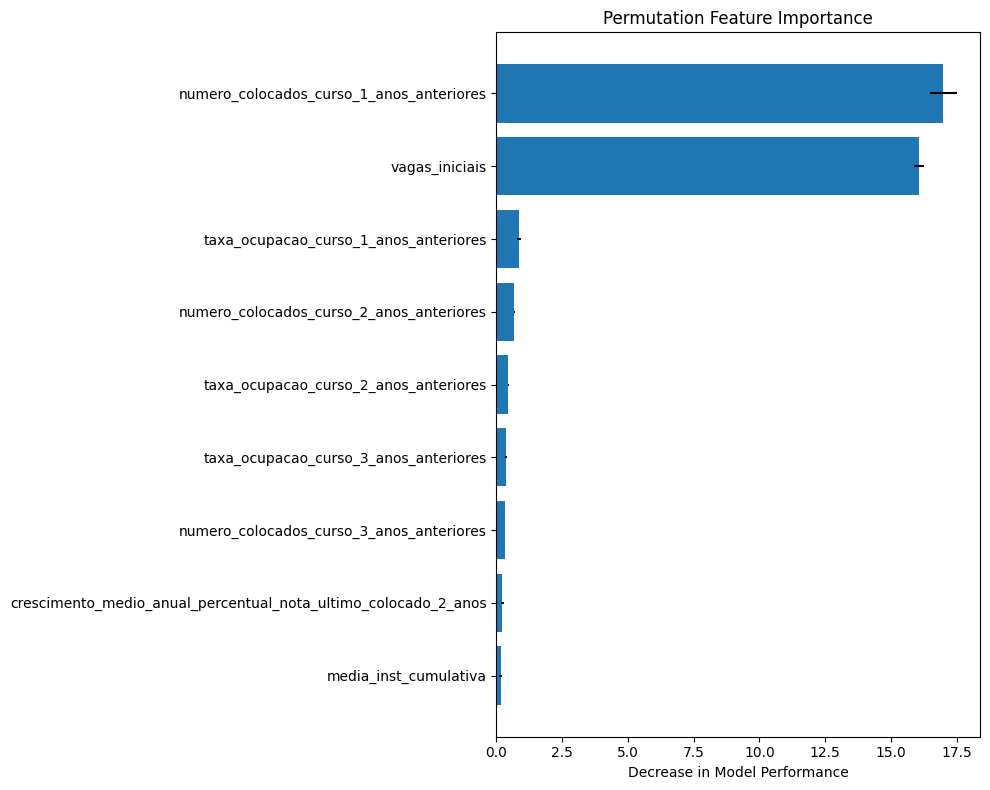

In [25]:
# Calculate permutation importance on validation set
perm_importance = permutation_importance(
    model_colocados, X_valid, y_valid, 
    n_repeats=10,  # Number of times to shuffle each feature
    random_state=42,
    scoring='neg_mean_absolute_error'
)

# Create DataFrame
perm_importance_df = pd.DataFrame({
    'feature': X_valid.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

# Plot with error bars
plt.figure(figsize=(10, 8))
top_features = perm_importance_df.head(15)
plt.barh(top_features['feature'], top_features['importance_mean'], 
         xerr=top_features['importance_std'])
plt.title('Permutation Feature Importance')
plt.xlabel('Decrease in Model Performance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [26]:
### Linear Regression Model Testing
from sklearn.linear_model import LinearRegression

# Treinar modelo Linear Regression
model_colocados_2 = LinearRegression()
model_colocados_2.fit(X_train, y_train)

# Fazer previs√µes para 2023
y_pred_2023 = model_colocados_2.predict(X_valid)

# Calcular m√©tricas de erro para 2023
mae_2023 = mean_absolute_error(y_valid, y_pred_2023)
mse_2023 = mean_squared_error(y_valid, y_pred_2023)
rmse_2023 = np.sqrt(mse_2023)
r2_2023 = r2_score(y_valid, y_pred_2023)

# Mostrar resultados de 2023
print(f"Erro M√©dio Absoluto (2023): {mae_2023:.2f}")
print(f"Erro Quadr√°tico M√©dio (2023): {mse_2023:.2f}")
print(f"Raiz do Erro Quadr√°tico M√©dio (2023): {rmse_2023:.2f}")
print(f"R¬≤ (2023): {r2_2023:.2f}")

# Fazer previs√µes para 2024
y_pred_2024 = model_colocados_2.predict(X_test.values)


# Criar DataFrame com previs√µes e caracter√≠sticas originais
predictions_2024 = test.copy()
predictions_2024['colocados_prevista'] = y_pred_2024
predictions_2024['colocados_real'] = y_test.values
predictions_2024['erro'] = predictions_2024['colocados_prevista'] - predictions_2024['colocados_real']


# Ordenar por erro absoluto
predictions_2024 = predictions_2024.sort_values(by='erro', key=abs)

# Calcular m√©tricas de erro para 2024
mae = mean_absolute_error(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])
mse = mean_squared_error(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])
rmse = np.sqrt(mse)
r2 = r2_score(predictions_2024['colocados_real'], predictions_2024['colocados_prevista'])

# Mostrar m√©tricas de 2024
print("\nM√©tricas das Previs√µes 2024:")
print(f"Erro M√©dio Absoluto: {mae:.2f}")
print(f"Erro Quadr√°tico M√©dio: {mse:.2f}")
print(f"Raiz do Erro Quadr√°tico M√©dio: {rmse:.2f}")
print(f"R¬≤: {r2:.3f}")

# Calcular percentagem de previs√µes com diferentes margens de erro absoluto
# Erro = 0 (previs√£o exatamente igual ao valor real)

errors_within_0 = (abs(predictions_2024['erro']) == 0).mean() * 100
print(f"Percentagem de previs√µes exatas (erro = 0): {errors_within_0:.1f}%")

# Erro at√© 1 colocado de diferen√ßa
errors_within_1 = (abs(predictions_2024['erro']) <= 1).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 1 colocado: {errors_within_1:.1f}%")

# Erro at√© 2 colocados de diferen√ßa
errors_within_2 = (abs(predictions_2024['erro']) <= 2).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 2 colocados: {errors_within_2:.1f}%")

# Erro at√© 3 colocados de diferen√ßa
errors_within_3 = (abs(predictions_2024['erro']) <= 3).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 3 colocados: {errors_within_3:.1f}%")

# Erro at√© 5 colocados de diferen√ßa
errors_within_5 = (abs(predictions_2024['erro']) <= 5).mean() * 100
print(f"Percentagem de previs√µes com erro at√© 5 colocados: {errors_within_5:.1f}%")

Erro M√©dio Absoluto (2023): 2.95
Erro Quadr√°tico M√©dio (2023): 23.24
Raiz do Erro Quadr√°tico M√©dio (2023): 4.82
R¬≤ (2023): 0.99

M√©tricas das Previs√µes 2024:
Erro M√©dio Absoluto: 2.95
Erro Quadr√°tico M√©dio: 23.35
Raiz do Erro Quadr√°tico M√©dio: 4.83
R¬≤: 0.987
Percentagem de previs√µes exatas (erro = 0): 0.0%
Percentagem de previs√µes com erro at√© 1 colocado: 30.8%
Percentagem de previs√µes com erro at√© 2 colocados: 54.2%
Percentagem de previs√µes com erro at√© 3 colocados: 71.6%
Percentagem de previs√µes com erro at√© 5 colocados: 85.4%


/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
from statsmodels.tsa.arima.model import ARIMA

df_prediction = df[['course_id', 'ano', 'colocados']].copy()
df = df.sort_values(['course_id', 'ano'])      

results = []

for cid, grp in df.groupby('course_id'):
    ts = grp.set_index('ano')['colocados'].sort_index()

    train = ts[ts.index <= 2023]
    test  = ts[ts.index == 2024]
    
    # üõ°Ô∏è Verifica√ß√µes de seguran√ßa
    if train.empty or test.empty:
        continue

    # Escolha do modelo
    if len(train) < 3:
        forecast = pd.Series(train.iloc[-1], index=test.index)
    else:
        try:
            model = ARIMA(train, order=(1, 1, 0)).fit()
            forecast = model.forecast(steps=len(test))
        except:
            # fallback: previs√£o ing√™nua
            forecast = pd.Series(train.iloc[-1], index=test.index)

    results.append(
        pd.DataFrame({
            'course_id'     : cid,
            'ano'           : test.index,
            'colocados_real'     : test.values,
            'colocados_prevista' : forecast.values
        })
    )


pred_df = pd.concat(results, ignore_index=True)
pred_df['erro'] = pred_df['colocados_prevista'] - pred_df['colocados_real']

mae  = mean_absolute_error(pred_df['colocados_real'], pred_df['colocados_prevista'])
mse  = mean_squared_error(pred_df['colocados_real'], pred_df['colocados_prevista'])
rmse = np.sqrt(mse)
r2   = r2_score(pred_df['colocados_real'], pred_df['colocados_prevista'])

print("---- M√©tricas Previs√£o 2024 ----")
print(f"Erro M√©dio Absoluto:           {mae:.2f}")
print(f"Erro Quadr√°tico M√©dio:         {mse:.2f}")
print(f"Raiz do Erro Quadr√°tico M√©dio: {rmse:.2f}")
print(f"R¬≤:                            {r2:.3f}")

thresholds = {
    0: "exatas (erro = 0)",
    1: "‚â§‚ÄØ1 colocado",
    2: "‚â§‚ÄØ2 colocados",
    3: "‚â§‚ÄØ3 colocados",
    5: "‚â§‚ÄØ5 colocados",
}

for lim, label in thresholds.items():
    pct = (abs(pred_df['erro']) <= lim).mean() * 100
    print(f"Percentagem de previs√µes {label}: {pct:.1f}%")

/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-pa

---- M√©tricas Previs√£o 2024 ----
Erro M√©dio Absoluto:           2.58
Erro Quadr√°tico M√©dio:         29.12
Raiz do Erro Quadr√°tico M√©dio: 5.40
R¬≤:                            0.984
Percentagem de previs√µes exatas (erro = 0): 25.7%
Percentagem de previs√µes ‚â§‚ÄØ1 colocado: 58.3%
Percentagem de previs√µes ‚â§‚ÄØ2 colocados: 68.6%
Percentagem de previs√µes ‚â§‚ÄØ3 colocados: 76.0%
Percentagem de previs√µes ‚â§‚ÄØ5 colocados: 84.4%


/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/rodrigo.brigham/dges_analysis/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cann

### generate predictions for 2025

In [28]:


# Get data from last 3 years for calculating trends
df_extra = df_feature_eng[df_feature_eng['ano'].isin([2022,2023,2024])].copy()

# Create 2025 dataframe based on 2024 data
df25 = df_feature_eng[df_feature_eng['ano']==2024].copy()


renamed_columns = {
    'ano': 'ano',
    'course_id': 'course_id', 
    'codigo_instituicao': 'codigo_instituicao',
    'instituicao': 'instituicao',
    'codigo_curso': 'codigo_curso',
    'curso': 'curso',
    'media_curso_cumulativa': 'media_curso_cumulativa',
    'media_inst_cumulativa': 'media_inst_cumulativa',
    'vagas_iniciais': 'vagas_iniciais',
    'taxa_ocupacao': 'taxa_ocupacao_curso_1_anos_anteriores',
    'nota_ultimo_colocado': 'nota_ultimo_colocado_curso_1_anos_anteriores',
    'colocados': 'numero_colocados_curso_1_anos_anteriores',
    'nota_ultimo_colocado_curso_1_anos_anteriores': 'nota_ultimo_colocado_curso_2_anos_anteriores',
    'nota_ultimo_colocado_curso_2_anos_anteriores': 'nota_ultimo_colocado_curso_3_anos_anteriores',
    'taxa_ocupacao_curso_1_anos_anteriores': 'taxa_ocupacao_curso_2_anos_anteriores', 
    'taxa_ocupacao_curso_2_anos_anteriores': 'taxa_ocupacao_curso_3_anos_anteriores',
    'numero_colocados_curso_1_anos_anteriores': 'numero_colocados_curso_2_anos_anteriores',
    'numero_colocados_curso_2_anos_anteriores': 'numero_colocados_curso_3_anos_anteriores'
}

# Keep only columns that are keys in renamed_columns
df25 = df25[list(renamed_columns.keys())]

df25 = df25.rename(columns=renamed_columns)

# Set year to 2025
df25['ano'] = 2025

df25['crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos'] = ((df25['nota_ultimo_colocado_curso_1_anos_anteriores'] / df25['nota_ultimo_colocado_curso_2_anos_anteriores']) - 1).round(2)
df25['crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos'] = (((df25['nota_ultimo_colocado_curso_1_anos_anteriores'] / df25['nota_ultimo_colocado_curso_3_anos_anteriores']) - 1)/2).round(2)

df25


ano  course_id  codigo_instituicao  \
17304  2025  8002_3131                3131   
17305  2025  8005_3011                3011   
17306  2025  8005_3134                3134   
17307  2025  8014_1516                1516   
17308  2025  8014_3101                3101   
...     ...        ...                 ...   
18167  2025  L189_6800                6800   
18168  2025  L192_0501                 501   
18169  2025  L193_1203                1203   
18170  2025  L194_3012                3012   
18173  2025  L207_3241                3241   

                                             instituicao codigo_curso  \
17304  Instituto Polit√©cnico do Porto - Escola Superi...         8002   
17305  Universidade de Aveiro - Instituto Superior de...         8005   
17306  Instituto Polit√©cnico do Porto - Instituto Sup...         8005   
17307  Universidade de Lisboa - Instituto Superior de...         8014   
17308  Instituto Polit√©cnico de Leiria - Escola Super...         8014   
...                                                  ...          ...   
18167          ISCTE - Instituto Universit√°rio de Lisboa         L189   
18168  Universidade de Coimbra - Faculdade de Ci√™ncia...         L192   
18169  Universidade de Tr√°s-os-Montes e Alto Douro - ...         L193   
18170  Universidade de Aveiro - Escola Superior de Te...         L194   
18173  Instituto Polit√©cnico de Tomar - Escola Superi...         L207   

                                         curso  media_curso_cumulativa  \
17304          L√≠nguas e Culturas Estrangeiras                   142.2   
17305           Marketing (regime p√≥s-laboral)                   122.9   
17306           Marketing (regime p√≥s-laboral)                   134.2   
17307      Servi√ßo Social (regime p√≥s-laboral)                   130.4   
17308      Servi√ßo Social (regime p√≥s-laboral)                   112.3   
...                                        ...                     ...   
18167    Ci√™ncia de Dados (regime p√≥s-laboral)                   143.0   
18168            Engenharia e Ci√™ncia de Dados                   133.8   
18169   Matem√°tica Aplicada e Ci√™ncia de Dados                   116.3   
18170         Eletr√≥nica e Mec√¢nica Industrial                   135.2   
18173  Turismo e Gest√£o do Patrim√≥nio Cultural                   116.6   

       media_inst_cumulativa  vagas_iniciais  \
17304                  131.3            55.0   
17305                  126.7            20.0   
17306                  136.8            27.0   
17307                  138.9            32.0   
17308                  120.4            20.0   
...                      ...             ...   
18167                  142.7            30.0   
18168                  131.3            40.0   
18169                  125.1            20.0   
18170                  118.7            35.0   
18173                  113.0            35.0   

       taxa_ocupacao_curso_1_anos_anteriores  \
17304                               1.000000   
17305                               1.000000   
17306                               1.000000   
17307                               1.000000   
17308                               0.900000   
...                                      ...   
18167                               1.000000   
18168                               1.000000   
18169                               0.650000   
18170                               1.000000   
18173                               0.342857   

       nota_ultimo_colocado_curso_1_anos_anteriores  \
17304                                         161.7   
17305                                         139.4   
17306                                         152.4   
17307                                         136.0   
17308                                         117.2   
...                                             ...   
18167                                         148.6   
18168                                         146.0   
18169            

In [29]:
# Lista das features que ser√£o usadas no modelo
features_colocados = [
    'vagas_iniciais',
    'media_inst_cumulativa',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
    'taxa_ocupacao_curso_1_anos_anteriores',
    'taxa_ocupacao_curso_2_anos_anteriores',
    'taxa_ocupacao_curso_3_anos_anteriores',

    'numero_colocados_curso_1_anos_anteriores',
    'numero_colocados_curso_2_anos_anteriores',
    'numero_colocados_curso_3_anos_anteriores',
]

# Preparar dados para previs√£o 2025
X_2025 = df25[features_colocados].copy()

# Fazer previs√µes para 2025
y_pred_2025_raw = model_colocados.predict(X_2025)

# Obter previs√µes de todas as √°rvores para calcular intervalo de confian√ßa
all_tree_preds_colocados = np.array([tree.predict(X_2025.values) for tree in model_colocados.estimators_])

# Limitar previs√µes de cada √°rvore ao n√∫mero de vagas iniciais
vagas_iniciais_array = X_2025['vagas_iniciais'].values
all_tree_preds_colocados = np.minimum(all_tree_preds_colocados, vagas_iniciais_array[np.newaxis, :])


# Calcular m√©dia das previs√µes para 2025
y_pred_2025_colocados = np.mean(all_tree_preds_colocados, axis=0).round(0)

# Calcular intervalo de confian√ßa de 95%
lower_bounds_colocados = np.percentile(all_tree_preds_colocados, 0.5, axis=0).round(0)
upper_bounds_colocados = np.percentile(all_tree_preds_colocados, 99.5, axis=0).round(0)

# Limitar limite superior ao n√∫mero de vagas iniciais
upper_bounds_colocados = np.minimum(upper_bounds_colocados, vagas_iniciais_array)


In [30]:
################# nota ultimo colocado #####################

# Lista das features que ser√£o usadas no modelo
features_nota_ultimo_colocado = [

    'nota_ultimo_colocado_curso_1_anos_anteriores',
    'nota_ultimo_colocado_curso_2_anos_anteriores',
    'nota_ultimo_colocado_curso_3_anos_anteriores',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_2_anos',
    'crescimento_medio_anual_percentual_nota_ultimo_colocado_3_anos',
]

# Preparar dados para previs√£o 2025
X_2025 = df25[features_nota_ultimo_colocado].copy()

# Fazer previs√µes para 2025
y_pred_2025_raw = model_nota_ultimo_colocado.predict(X_2025)

# Obter previs√µes de todas as √°rvores para calcular intervalo de confian√ßa
all_tree_preds_nota = np.array([tree.predict(X_2025.values) for tree in model_nota_ultimo_colocado.estimators_])

# Calcular m√©dia das previs√µes para 2025
y_pred_2025_nota = np.mean(all_tree_preds_nota, axis=0).round(1)

# Calcular intervalo de confian√ßa de 95%
lower_bounds_nota = np.percentile(all_tree_preds_nota, 0.5, axis=0).round(1)
upper_bounds_nota = np.percentile(all_tree_preds_nota, 99.5, axis=0).round(1)

In [31]:
# Criar DataFrame com previs√µes e caracter√≠sticas originais
predictions_2025 = df25.copy()

predictions_2025['colocados_previsto'] = y_pred_2025_colocados
predictions_2025['lower_95_ci_colocados'] = lower_bounds_colocados
predictions_2025['upper_95_ci_colocados'] = upper_bounds_colocados

predictions_2025['nota_ultimo_colocado_prevista'] = y_pred_2025_nota
predictions_2025['lower_95_ci_nota_ultimo_colocado'] = lower_bounds_colocados
predictions_2025['upper_95_ci_nota_ultimo_colocado'] = upper_bounds_colocados

predictions_2025= predictions_2025[[
 'ano',
 'course_id',
 'codigo_instituicao',
 'instituicao',
 'codigo_curso',
 'curso',
 'vagas_iniciais',
 'nota_ultimo_colocado_prevista',
 'colocados_previsto',
 'lower_95_ci_colocados',
 'upper_95_ci_colocados',
 'lower_95_ci_nota_ultimo_colocado',
 'upper_95_ci_nota_ultimo_colocado']]

predictions_2025.to_csv('predictions_2025.csv', index=False)